In [1]:
import nltk
import pandas as pd
import numpy as np
import string
import seaborn as sns
import matplotlib.pyplot as plt
import plotly 
import re
import collections
import math
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
import tensorflow as tf
%matplotlib inline


In [2]:
xls = pd.ExcelFile('Disbursement - Merge Data.xlsx')
df1 = pd.read_excel(xls, 'Loan Sheet')
df2 = pd.read_excel(xls, 'Customer data Sheet')
#df1=df1.apply(lambda x:x.astype(str).str.lower())
#df2=df2.apply(lambda x:x.astype(str).str.lower())

In [3]:
df1.head()

,SR NO.,LOAN STATUS,DATE,LOAN ID,APPLICANT FIRST NAME,APPLICANT LAST NAME,LOAN AMOUNT,Loan Term,Interest Type,INTEREST RATE,...,COLLECTION DATE-3,EMI Date-3,Defaulter Tenure (DT)-3,Interest Charged (IC)-3,GST ON IC-3,Total Repayment-3,Total Collected,REMARKS,Policy ID,Refund Amount
0,1,Closed,2019-02-21,11272,KAIOMARZ,KEKUNA,10000,45,NaN,0.36,...,NaN,NaN,NaN,NaN,NaN,NaN,10000,Successful,5,NaN
1,2,Closed,2019-02-25,9495,ASHOKKUMAR,JAYAKUMAR,5000,30,NaN,0.36,...,NaN,NaN,NaN,NaN,NaN,NaN,5150,Successful,5,NaN
2,3,Default collected,2019-02-26,13798,AMOL,NAGARE,5000,30,NaN,0.36,...,NaN,NaN,NaN,NaN,NaN,NaN,5966,Repayment done of Rs.5966 on dated 03-04-2019 ...,5,NaN
3,4,Closed,2019-02-26,12305,PRAKASH,DESOUZA,3000,30,NaN,0.36,...,NaN,NaN,NaN,NaN,NaN,NaN,3090,Successful,5,NaN
4,5,Closed,2019-02-27,11754,RAVI,MANDAVKAR,3000,30,NaN,0.36,...,NaN,NaN,NaN,NaN,NaN,NaN,3090,Successful,5,NaN


In [4]:
df2.head()

,SR NO.,Type of Application,DATE,LOAN ID,APPLICANT FIRST NAME,APPLICANT LAST NAME,GENDER,DATE OF BIRTH,MARITAL STATUS,RESIDENTIAL STATUS-OWNED/RENTED,...,EMI DUE DATE,EMI END DATE,CUSTOMER'S BANK NAME,Customer bank account type,NAME OF THE REFERENCE 1,CONTACT NUMBER,NAME OF THE REFERENCE 2,CONTACT NUMBER,Lender,LOAN STATUS
0,1,Fresh,2019-02-21,11272,KAIOMARZ,KEKUNA,MALE,1977-09-07,MARRIED,SELF OWNED,...,2019-04-08,2019-04-08,ZOROASTRIAN CO OP BANK LIMITED,NaN,ARUN SHINDE,9.767757e+09,SACHIN GHADGE,9702200856,Apollo,Closed
1,2,Fresh,2019-02-25,9495,ASHOKKUMAR,JAYAKUMAR,MALE,1991-04-01 00:00:00,MARRIED,SELF OWNED,...,2019-03-27,2019-03-27,AXIS BANK,NaN,NAVEEN KUMAR,8.220719e+09,DHARIK,9600153649,Apollo,Closed
2,3,Fresh,2019-02-26,13798,AMOL,NAGARE,MALE,1986-11-11 00:00:00,MARRIED,RENTED(COMPANY PROVIDED ROOM),...,2019-03-28,2019-03-28,AXIS BANK,NaN,KUNAL,8.097141e+09,ANITA,9271911124,Apollo,Default collected
3,4,Fresh,2019-02-26,12305,PRAKASH,DESOUZA,MALE,1981-07-13 00:00:00,SINGLE,PARENT OWNED,...,2019-03-29,2019-03-29,AXIS BANK,NaN,JAMES CHRISTIAN,9.898260e+09,PINTU CHRISTIAN,8780098879,Apollo,Closed
4,5,Fresh,2019-02-27,11754,RAVI,MANDAVKAR,MALE,1985-12-20 00:00:00,MARRIED,PARENT OWNED,...,2019-03-30,2019-03-30,KOTAK MAHINDRA BANK,NaN,CHANDRAKANT THAKARE,9.769206e+09,MAHESH SHINDE,9769206114,Apollo,Closed


In [5]:
#df1.info()

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5881 entries, 0 to 5880
Data columns (total 50 columns):
SR NO.                                                 5881 non-null int64
Type of Application                                    5881 non-null object
DATE                                                   5881 non-null datetime64[ns]
LOAN ID                                                5881 non-null int64
APPLICANT FIRST NAME                                   5881 non-null object
APPLICANT LAST NAME                                    5878 non-null object
GENDER                                                 5881 non-null object
DATE OF BIRTH                                          5881 non-null object
MARITAL STATUS                                         5881 non-null object
RESIDENTIAL STATUS-OWNED/RENTED                        5881 non-null object
Address type                                           4920 non-null object
PERMANENT RESIDENTIAL ADDRESS                      

Text(0, 0.5, 'Loans disembursed')

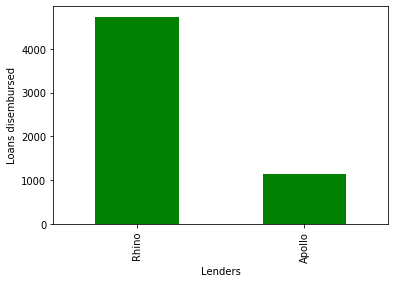

In [7]:
df1.Lender.value_counts().plot.bar(color='green')
plt.xlabel("Lenders")
plt.ylabel("Loans disembursed")

Text(0, 0.5, 'Loans disembursed')

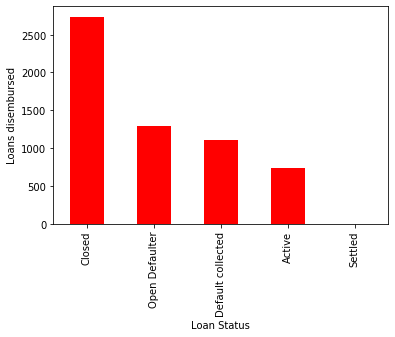

In [8]:
df1['LOAN STATUS'].value_counts().plot(kind='bar',color="red")
plt.xlabel("Loan Status")
plt.ylabel("Loans disembursed")

In [9]:
df2['CREDIT SCORE'] = df2['CREDIT SCORE'].fillna(df2['CREDIT SCORE'].median())
df2 = df2.apply(lambda x: x.fillna(x.value_counts().index[0]))
df1 = df1.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [10]:
df1["Mode of Disbursement"].value_counts()

IMPS    5831
NEFT      50
Name: Mode of Disbursement, dtype: int64

In [11]:
df1 = df1.apply(lambda x:x.astype(str).str.lower())
df2 = df2.apply(lambda x:x.astype(str).str.lower())

In [12]:
set(df1["LOAN STATUS"])

{'active', 'closed', 'default collected', 'open defaulter', 'settled'}

In [13]:
s=0
for i in range(0,len(df1)):
    if df1["EMI-1 COLLECTION STATUS"][i]=="collected ":
        df1["EMI-1 COLLECTION STATUS"][i]="collected"
    if df1["EMI-1 COLLECTION STATUS"][i]=="failed ":
        df1["EMI-1 COLLECTION STATUS"][i]="failed"

In [14]:
Rhino=df1[df1['Lender'] == "rhino"]
print(Rhino["LOAN STATUS"].value_counts())
print("\n")
print(df1["EMI-1 COLLECTION STATUS"].value_counts())

closed               2003
open defaulter       1154
default collected     838
active                740
Name: LOAN STATUS, dtype: int64


collected    4638
failed       1243
Name: EMI-1 COLLECTION STATUS, dtype: int64


In [15]:
Apollo=df1[df1['Lender'] == "apollo"]
print(Apollo["LOAN STATUS"].value_counts())

closed               736
default collected    271
open defaulter       138
settled                1
Name: LOAN STATUS, dtype: int64


In [16]:
df1["LOAN STATUS"].value_counts()

closed               2739
open defaulter       1292
default collected    1109
active                740
settled                 1
Name: LOAN STATUS, dtype: int64

In [17]:
print(Apollo["EMI-1 COLLECTION STATUS"].value_counts())

collected    1017
failed        129
Name: EMI-1 COLLECTION STATUS, dtype: int64


In [18]:
print(df1["EMI-1 COLLECTION STATUS"].value_counts())

collected    4638
failed       1243
Name: EMI-1 COLLECTION STATUS, dtype: int64


In [19]:
print(Rhino["EMI-1 COLLECTION STATUS"].value_counts())

collected    3621
failed       1114
Name: EMI-1 COLLECTION STATUS, dtype: int64


In [20]:
set(Rhino["EMI-1 COLLECTION STATUS"])

{'collected', 'failed'}

Text(0, 0.5, 'Number of loans disembursed by Rhino')

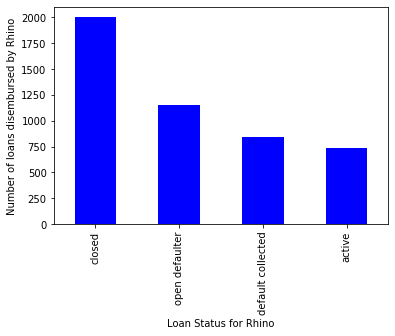

In [21]:
Rhino['LOAN STATUS'].value_counts().plot(kind='bar',color="blue")
plt.xlabel("Loan Status for Rhino")
plt.ylabel("Number of loans disembursed by Rhino")

Text(0, 0.5, 'Number of loans disembursed by Apollo')

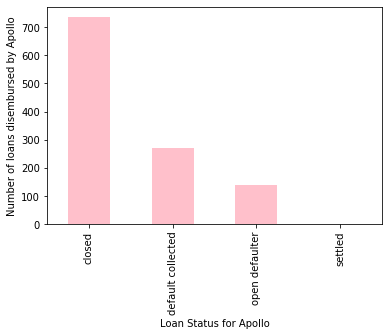

In [22]:
Apollo['LOAN STATUS'].value_counts().plot(kind='bar',color="pink")
plt.xlabel("Loan Status for Apollo")
plt.ylabel("Number of loans disembursed by Apollo")

In [23]:
#df1.iloc[0:100, 1:5]
df2["CREDIT SCORE"].value_counts()

755.0    211
671.0    185
760.0    143
728.0     88
718.0     83
        ... 
379.0      1
804.0      1
886.0      1
558.0      1
424.0      1
Name: CREDIT SCORE, Length: 441, dtype: int64

In [24]:
len(df1.columns)

52

In [25]:
len(df2.columns)

df2["CREDIT SCORE"].value_counts()

755.0    211
671.0    185
760.0    143
728.0     88
718.0     83
        ... 
379.0      1
804.0      1
886.0      1
558.0      1
424.0      1
Name: CREDIT SCORE, Length: 441, dtype: int64

In [26]:
l=[]
l1=[]#df1 column names
for i in range(0,len(df1.columns)):
    l.append(df1.columns[i])
    l1.append(df1.columns[i])

In [27]:
l2=[]#df2 column names not in df1
drop=[]
for i in range(0,len(df2.columns)):
    if df2.columns[i] not in l:
        l.append(df2.columns[i])
        l2.append(df2.columns[i])
    if df2.columns[i] in l1:#df1 columns which are in df2 too
        drop.append(df2.columns[i])

In [28]:
drop

['SR NO.',
 'DATE',
 'LOAN ID',
 'APPLICANT FIRST NAME',
 'APPLICANT LAST NAME',
 'LOAN AMOUNT',
 'Loan Term ',
 'Interest Type',
 'INTEREST RATE',
 'INTEREST AMOUNT',
 'EMI AMOUNT',
 'PROCESSING FEES',
 'GST (18%)',
 'Pre-emi interest',
 'DISBURSED AMOUNT',
 'Mode of Disbursement',
 'DATE OF DISBURSEMENT',
 'No. of Installments',
 'EMI DUE DATE',
 'EMI END DATE',
 'Lender',
 'LOAN STATUS']

In [29]:
len(l)

80

In [30]:
len(l2)

28

In [31]:
df2_1=df2.drop(drop,axis=1)

In [32]:
data=pd.concat([df1, df2_1], axis=1, sort=False)

In [33]:
data.head(5)

,SR NO.,LOAN STATUS,DATE,LOAN ID,APPLICANT FIRST NAME,APPLICANT LAST NAME,LOAN AMOUNT,Loan Term,Interest Type,INTEREST RATE,...,CREDIT SCORE,LOAN PURPOSE,Payment Frequency,Loan Tenure unit,CUSTOMER'S BANK NAME,Customer bank account type,NAME OF THE REFERENCE 1,CONTACT NUMBER,NAME OF THE REFERENCE 2,CONTACT NUMBER
0,1,closed,2019-02-21,11272,kaiomarz,kekuna,10000,45,flat,0.36,...,680.0,daily needs,monthly,months,zoroastrian co op bank limited,savings,arun shinde,9767756915.0,sachin ghadge,9702200856
1,2,closed,2019-02-25,9495,ashokkumar,jayakumar,5000,30,flat,0.36,...,694.0,others,monthly,months,axis bank,savings,naveen kumar,8220718746.0,dharik,9600153649
2,3,default collected,2019-02-26,13798,amol,nagare,5000,30,flat,0.36,...,648.0,daily needs,monthly,months,axis bank,savings,kunal,8097141310.0,anita,9271911124
3,4,closed,2019-02-26,12305,prakash,desouza,3000,30,flat,0.36,...,702.0,medical expenses,monthly,months,axis bank,savings,james christian,9898259847.0,pintu christian,8780098879
4,5,closed,2019-02-27,11754,ravi,mandavkar,3000,30,flat,0.36,...,679.0,daily needs,monthly,months,kotak mahindra bank,savings,chandrakant thakare,9769206128.0,mahesh shinde,9769206114


In [34]:
for i in range(0,len(data)):
    data["No. of Installments"][i]=int(data["No. of Installments"][i])

data=data[data["No. of Installments"]==1]
data 

,SR NO.,LOAN STATUS,DATE,LOAN ID,APPLICANT FIRST NAME,APPLICANT LAST NAME,LOAN AMOUNT,Loan Term,Interest Type,INTEREST RATE,...,CREDIT SCORE,LOAN PURPOSE,Payment Frequency,Loan Tenure unit,CUSTOMER'S BANK NAME,Customer bank account type,NAME OF THE REFERENCE 1,CONTACT NUMBER,NAME OF THE REFERENCE 2,CONTACT NUMBER
0,1,closed,2019-02-21,11272,kaiomarz,kekuna,10000,45,flat,0.36,...,680.0,daily needs,monthly,months,zoroastrian co op bank limited,savings,arun shinde,9767756915.0,sachin ghadge,9702200856
1,2,closed,2019-02-25,9495,ashokkumar,jayakumar,5000,30,flat,0.36,...,694.0,others,monthly,months,axis bank,savings,naveen kumar,8220718746.0,dharik,9600153649
2,3,default collected,2019-02-26,13798,amol,nagare,5000,30,flat,0.36,...,648.0,daily needs,monthly,months,axis bank,savings,kunal,8097141310.0,anita,9271911124
3,4,closed,2019-02-26,12305,prakash,desouza,3000,30,flat,0.36,...,702.0,medical expenses,monthly,months,axis bank,savings,james christian,9898259847.0,pintu christian,8780098879
4,5,closed,2019-02-27,11754,ravi,mandavkar,3000,30,flat,0.36,...,679.0,daily needs,monthly,months,kotak mahindra bank,savings,chandrakant thakare,9769206128.0,mahesh shinde,9769206114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5876,5877,active,2020-04-02,396135,ankita,shedage,3000,15,flat,36,...,700.0,medical expenses,monthly,months,hdfc bank ltd.,savings,sameer shinde,9867153537.0,kanchan,7498127350
5877,5878,active,2020-04-02,406727,vitthal,borate,6000,30,flat,36,...,6.0,others,monthly,months,hdfc bank ltd.,savings,sakharam,8888374380.0,rakesh,7249825693
5878,5879,active,2020-04-02,407019,nilesh,shetw,7000,30,flat,36,...,407.0,daily needs,monthly,months,axis bank,savings,chetan raskar,9921522285.0,aviral sharma,9766115500
5879,5880,active,2020-04-02,409060,dattesh kumar,nachaegari,6000,30,flat,36,...,386.0,home furnishing,monthly,months,icici bank ltd.,savings,rohit ramavashi,9920353748.0,ganesh yadav,9769794899


In [35]:
data=data.drop(['No. of Installments'], axis=1)

data.head(5)

,SR NO.,LOAN STATUS,DATE,LOAN ID,APPLICANT FIRST NAME,APPLICANT LAST NAME,LOAN AMOUNT,Loan Term,Interest Type,INTEREST RATE,...,CREDIT SCORE,LOAN PURPOSE,Payment Frequency,Loan Tenure unit,CUSTOMER'S BANK NAME,Customer bank account type,NAME OF THE REFERENCE 1,CONTACT NUMBER,NAME OF THE REFERENCE 2,CONTACT NUMBER
0,1,closed,2019-02-21,11272,kaiomarz,kekuna,10000,45,flat,0.36,...,680.0,daily needs,monthly,months,zoroastrian co op bank limited,savings,arun shinde,9767756915.0,sachin ghadge,9702200856
1,2,closed,2019-02-25,9495,ashokkumar,jayakumar,5000,30,flat,0.36,...,694.0,others,monthly,months,axis bank,savings,naveen kumar,8220718746.0,dharik,9600153649
2,3,default collected,2019-02-26,13798,amol,nagare,5000,30,flat,0.36,...,648.0,daily needs,monthly,months,axis bank,savings,kunal,8097141310.0,anita,9271911124
3,4,closed,2019-02-26,12305,prakash,desouza,3000,30,flat,0.36,...,702.0,medical expenses,monthly,months,axis bank,savings,james christian,9898259847.0,pintu christian,8780098879
4,5,closed,2019-02-27,11754,ravi,mandavkar,3000,30,flat,0.36,...,679.0,daily needs,monthly,months,kotak mahindra bank,savings,chandrakant thakare,9769206128.0,mahesh shinde,9769206114


In [36]:
#len(df)
#df=df[data.LOAN_STATUS != 'active']
#Sl_no=[i for i in range(0,len(data))]
#data["Sl_no"]=Sl_no
#df.head()
#data=data.set_index("Sl_no") 
#data=data.drop(['SR NO'])
data=data.reset_index(drop=True)

In [37]:
print(data["GENDER"].value_counts())

male      4996
female     450
Name: GENDER, dtype: int64


In [38]:
data.columns=data.columns.str.replace(r" ", '_')
data.columns=data.columns.str.replace(r".", '')

Text(0, 0.5, 'Number of loans disembursed by Rhino')

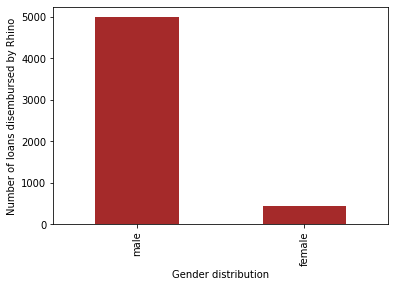

In [39]:
data['GENDER'].value_counts().plot(kind='bar',color="brown")
plt.xlabel("Gender distribution")
plt.ylabel("Number of loans disembursed by Rhino")

In [40]:
print(list(data["STATE"].value_counts()))

[1436, 650, 606, 493, 447, 425, 262, 215, 177, 167, 129, 84, 72, 70, 64, 28, 26, 19, 17, 16, 10, 9, 7, 7, 5, 3, 1, 1]


In [41]:
dict_state=dict( data["STATE"].value_counts() )
dict_state.keys()

dict_keys(['maharashtra', 'karnataka', 'telangana', 'gujarat', 'delhi', 'tamil nadu', 'uttar pradesh', 'rajasthan', 'andhra pradesh', 'haryana', 'madhya pradesh', 'punjab', 'bihar', 'kerala', 'odisha', 'assam', 'chhattisgarh', 'jharkhand', 'west bengal', 'uttarakhand', 'goa', 'chandigarh', 'puducherry (pondicherry)', 'himachal pradesh', 'dadar and nagar haveli', 'tripura', 'jammu and kashmir', 'new delhi south'])

In [42]:
set(data["STATE"])

{'andhra pradesh',
 'assam',
 'bihar',
 'chandigarh',
 'chhattisgarh',
 'dadar and nagar haveli',
 'delhi',
 'goa',
 'gujarat',
 'haryana',
 'himachal pradesh',
 'jammu and kashmir',
 'jharkhand',
 'karnataka',
 'kerala',
 'madhya pradesh',
 'maharashtra',
 'new delhi south',
 'odisha',
 'puducherry (pondicherry)',
 'punjab',
 'rajasthan',
 'tamil nadu',
 'telangana',
 'tripura',
 'uttar pradesh',
 'uttarakhand',
 'west bengal'}

Text(0, 0.5, 'States')

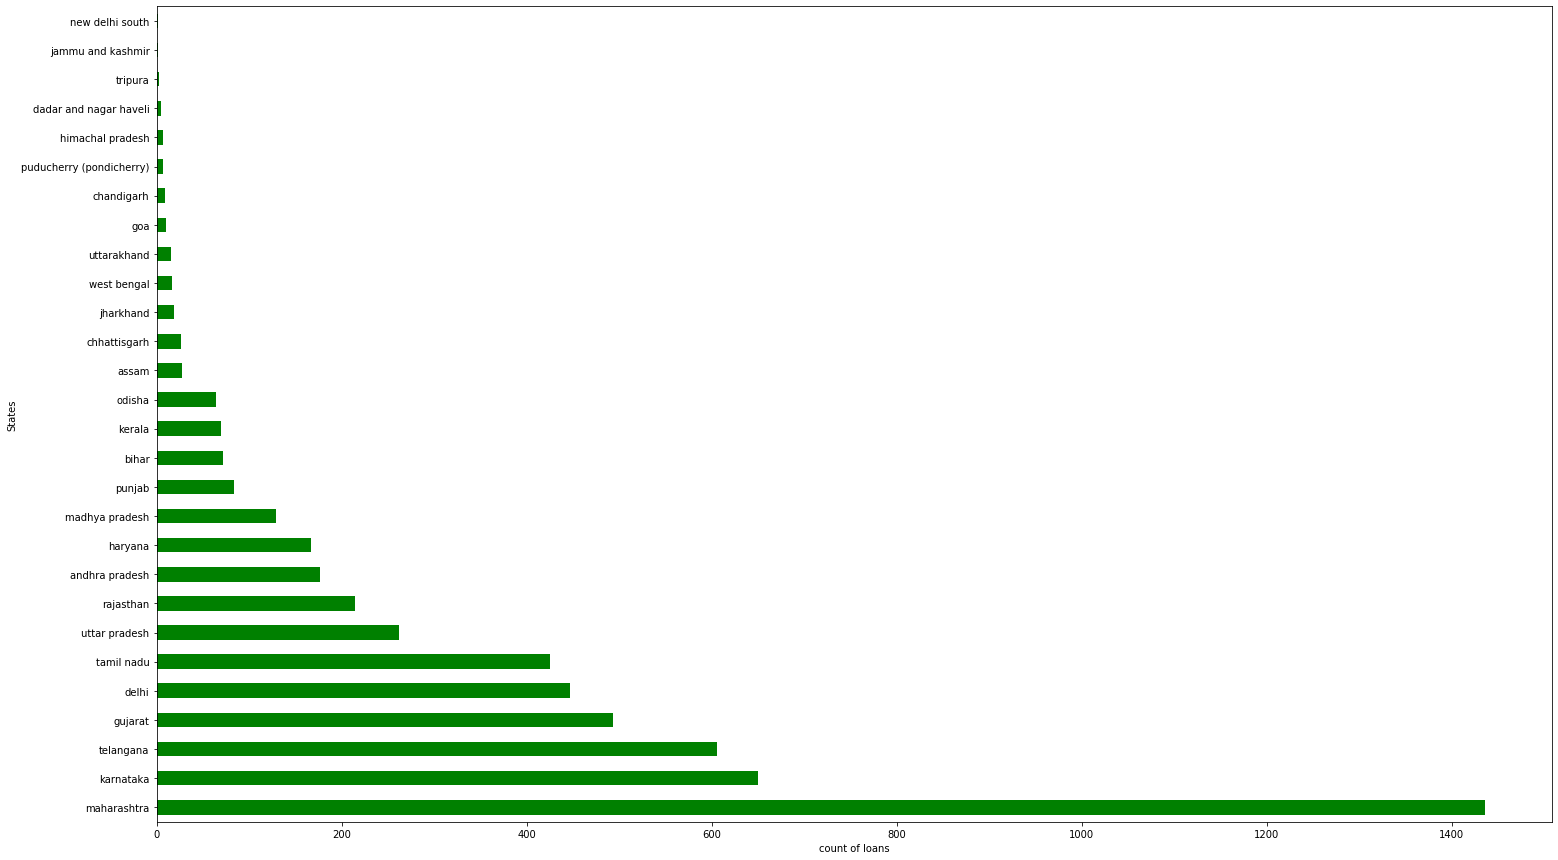

In [43]:
#g = sns.countplot(y=list(data["STATE"]), order=list(dict_state.keys()),size=(20,10))
#g.set_ylabel("States")
#g.set_title('Distribution of Loans')
#plt.show()
data['STATE'].value_counts().head(30).plot( kind='barh',figsize=(25,15),color="green")
plt.xlabel("count of loans")
plt.ylabel("States")

In [44]:
inc=list(data['NET_MONTHLY_INCOME'])
inc=[int(i) for i in inc]
data["NET_MONTHLY_INCOME"]=data["NET_MONTHLY_INCOME"].astype('int64')

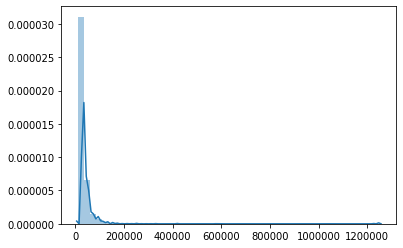

In [45]:
sns.distplot(inc)#monthly income vs no. of loans

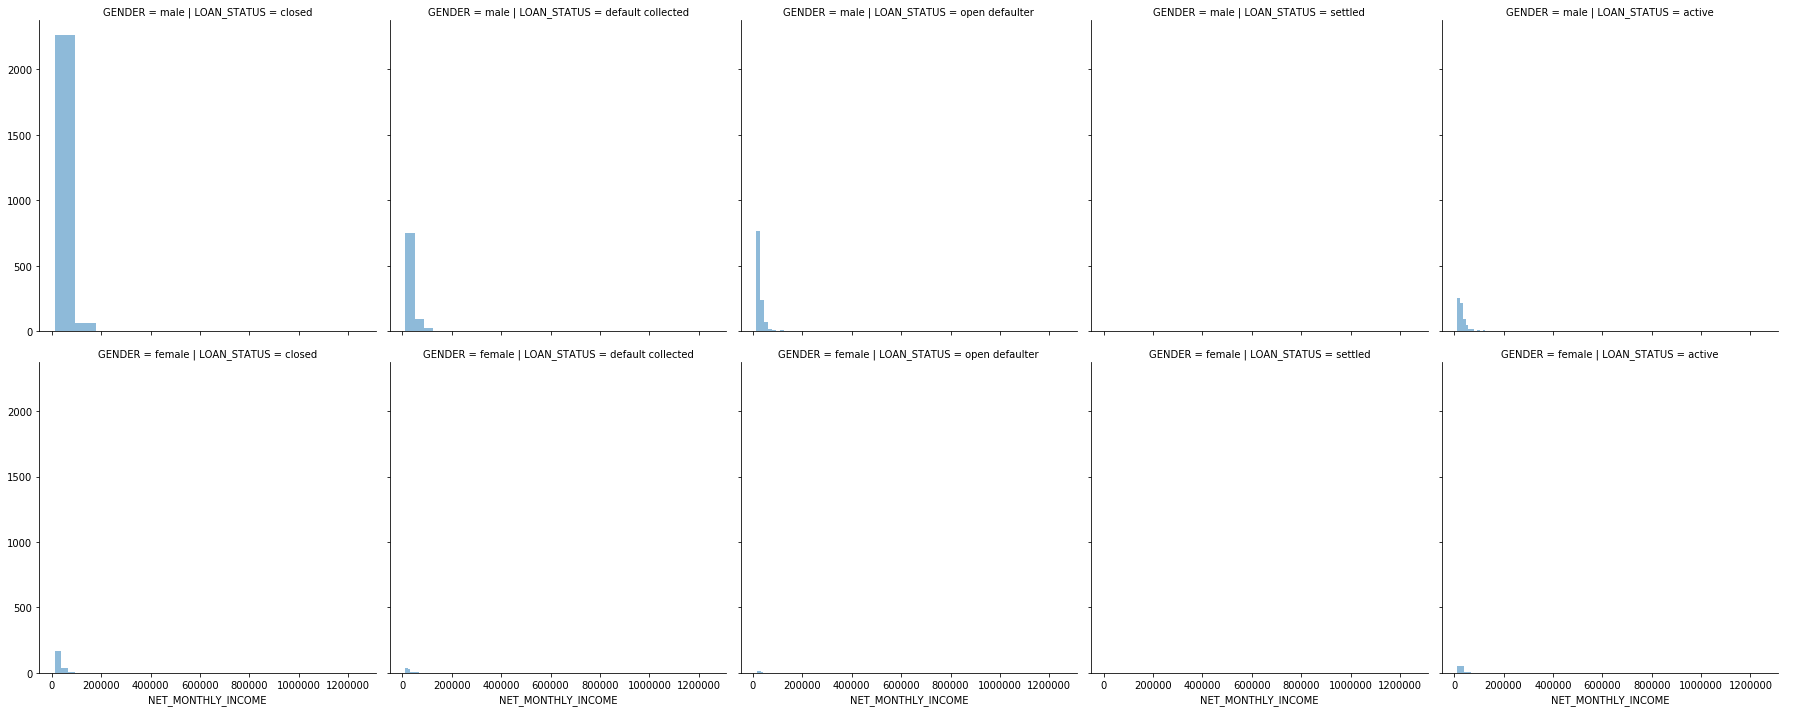

In [46]:
g = sns.FacetGrid(data, row='GENDER', col='LOAN_STATUS', height=5)
g.map(plt.hist, 'NET_MONTHLY_INCOME', alpha=0.5, bins=15,)
g.add_legend()
plt.show()

#sns.palplot(sns.color_palette("RdBu", n_colors=7))

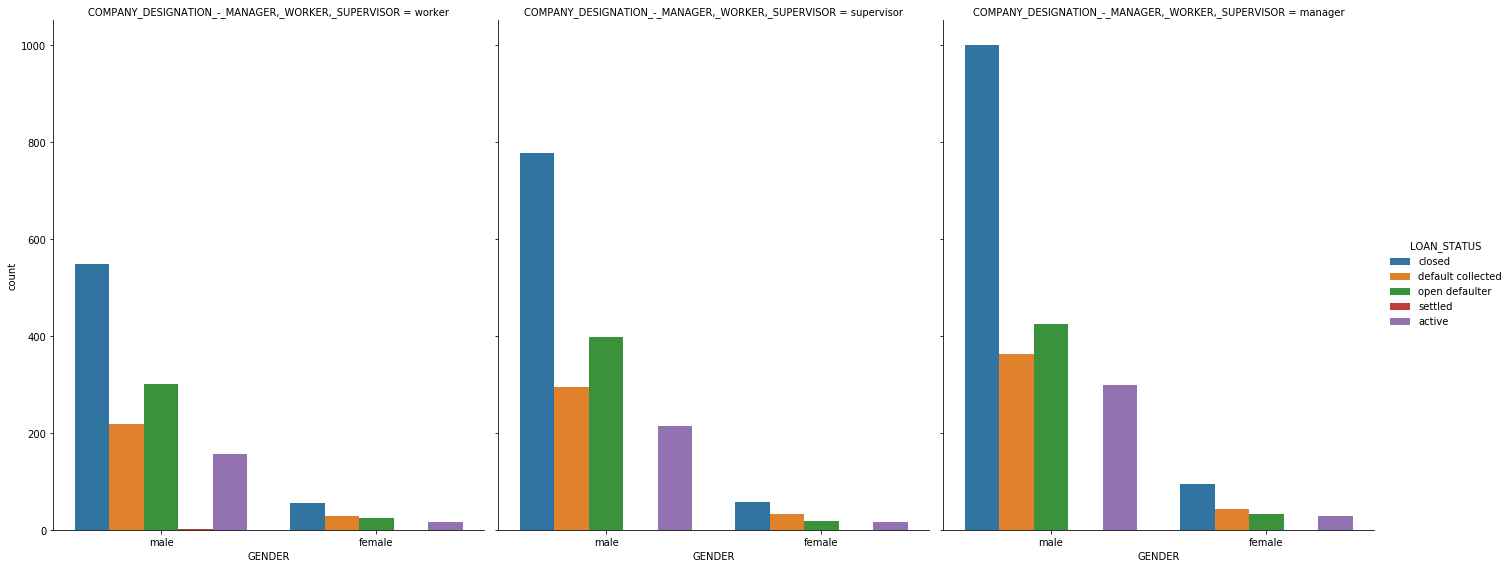

In [47]:
g = sns.catplot(x="GENDER", hue="LOAN_STATUS", col="COMPANY_DESIGNATION_-_MANAGER,_WORKER,_SUPERVISOR",
                data=data, kind="count",
                height=8, aspect=0.8);


In [48]:
list(data["CREDIT_SCORE"])
#set(data["NET_MONTHLY_INCOME"])
data["CREDIT_SCORE"]=data["CREDIT_SCORE"].str.replace("nan","0")
#data["CREDIT_SCORE"].fillna(data["CREDIT_SCORE"].mean())
for i in range(0,len(data)):
    data["CREDIT_SCORE"][i]=int(float(data["CREDIT_SCORE"][i]))


C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [382]:
#list(set(data["CREDIT_SCORE"]))

In [50]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(15)

,Total,Percent
CONTACT_NUMBER,0,0.0
Interest_Charged_(IC)-1,0,0.0
Bounce_Charges_(BC),0,0.0
GST_ON_BC,0,0.0
EMI-1_COLLECTION_STATUS,0,0.0
EMI-1COLLECTED_AMOUNT,0,0.0
COLLECTION_DATE-1,0,0.0
EMI_Date-1,0,0.0
Defaulter_Tenure_(DT)-1,0,0.0
GST_ON_IC-1,0,0.0


In [51]:
for i in range(0,len(data)):
    if list(data['RESIDENTIAL_STATUS-OWNED/RENTED'])[i]=="owned"or list(data['RESIDENTIAL_STATUS-OWNED/RENTED'])[i]=="self-owned":
        data['RESIDENTIAL_STATUS-OWNED/RENTED'][i]="self owned"
    elif list(data['RESIDENTIAL_STATUS-OWNED/RENTED'])[i]=="parent-owned" or list(data['RESIDENTIAL_STATUS-OWNED/RENTED'])[i]==" parent owned":
        data['RESIDENTIAL_STATUS-OWNED/RENTED'][i]="parent owned"
    elif list(data['RESIDENTIAL_STATUS-OWNED/RENTED'])[i]==" rented" or list(data['RESIDENTIAL_STATUS-OWNED/RENTED'])[i]=="rented(company provided room)":
        data['RESIDENTIAL_STATUS-OWNED/RENTED'][i]="rented"
    

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [52]:
data['RESIDENTIAL_STATUS-OWNED/RENTED'].value_counts()

parent owned    2696
rented          1524
self owned      1226
Name: RESIDENTIAL_STATUS-OWNED/RENTED, dtype: int64

In [53]:
resi=dict(data['RESIDENTIAL_STATUS-OWNED/RENTED'].value_counts())
resi

{'parent owned': 2696, 'rented': 1524, 'self owned': 1226}

# Percentage of loans as per Residential-Status

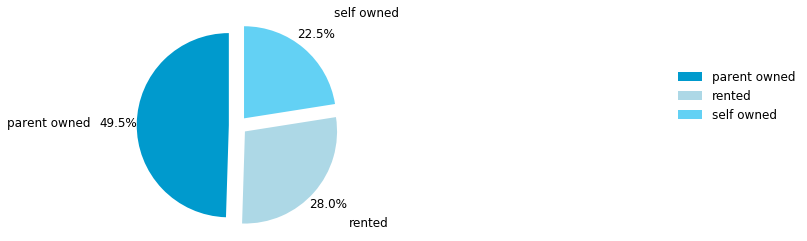

In [54]:
fig, ax = plt.subplots()
#plt.rcParams['font.sans-serif'] = 'Arial'
#plt.rcParams['font.family'] = 'sans-serif'
#plt.rcParams['text.color'] = '#909090'
#plt.rcParams['axes.labelcolor']= '#909090'
#plt.rcParams['xtick.color'] = '#909090'
#plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=12
color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9',   
                      '#C1F0F6', '#0099CC']

labels =  list(resi.keys())
percentages =list(resi.values())
explode=(0.1,0.1,0.1)
ax.pie(percentages, labels=labels,explode=explode,colors=color_palette_list[0:], autopct='%1.1f%%',shadow=False, startangle=90,   
       pctdistance=1.2,labeldistance=1.5)
ax.axis('equal')
#ax.set_title("Percentage of loans as per Residential-Status")
ax.legend(frameon=False, bbox_to_anchor=(2.2,0.8))

In [55]:
data["LOAN_AMOUNT"]=data["LOAN_AMOUNT"].astype("int64")
#data["CREDIT_SCORE"]=data["CREDIT_SCORE"].astype("float64")

In [56]:
#fig, ax = plt.subplots(figsize=(15,6))

#sns.swarmplot(y="LOAN_AMOUNT",x="LOAN_STATUS",hue='OCCUPATION',data=data,palette="Set1", dodge=True,size=5,ax=ax)
#plt.tight_layout()

In [57]:
#fig, ax = plt.subplots(figsize=(15,10))

#sns.swarmplot(y="NET_MONTHLY_INCOME",x="LOAN_STATUS",hue='OCCUPATION',data=data,palette="Set1", dodge=True,size=5,ax=ax)
#plt.tight_layout()

In [58]:
#fig, ax = plt.subplots(figsize=(15,10))

#sns.swarmplot(y="CREDIT_SCORE",x="LOAN_STATUS",hue='OCCUPATION',data=data,palette="Set1", dodge=True,size=5,ax=ax)
#plt.tight_layout()

In [59]:
#sns.swarmplot(x="COMPANY_DESIGNATION_-_MANAGER,_WORKER,_SUPERVISOR", y="NET_MONTHLY_INCOME", data=data)

In [60]:
cr=[]
income=[]
for i in range(0,len(data)):
    if data["CREDIT_SCORE"][i]!=30486:
        cr.append(data["CREDIT_SCORE"][i])
        income.append(data["NET_MONTHLY_INCOME"][i])


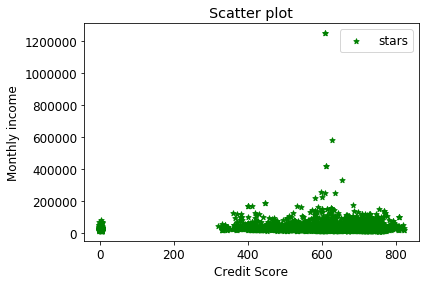

In [61]:
# x-axis values 
x =cr
# y-axis values 
y =income
  
# plotting points as a scatter plot 
plt.scatter(x, y, label= "stars", color= "green",  
            marker= "*", s=30) 
  
# x-axis label 
plt.xlabel('Credit Score') 
# frequency label 
plt.ylabel('Monthly income') 
# plot title 
plt.title('Scatter plot') 
# showing legend 
plt.legend() 
  
# function to show the plot 
plt.show() 

In [62]:
#sns.swarmplot(x="GENDER", y="NET MONTHLY INCOME", data=data)


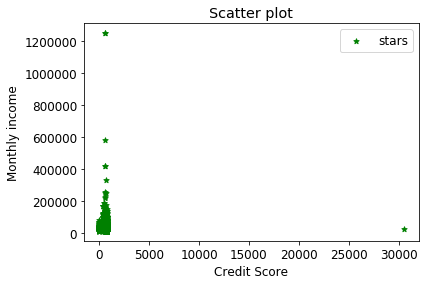

In [63]:
# x-axis values 
y =list(data["NET_MONTHLY_INCOME"])
# y-axis values 
x =list(data["CREDIT_SCORE"])
  
# plotting points as a scatter plot 
plt.scatter(x, y, label= "stars", color= "green",  
            marker= "*", s=30) 
  
# x-axis label 
plt.xlabel('Credit Score') 
# frequency label 
plt.ylabel('Monthly income') 
# plot title 
plt.title('Scatter plot') 
# showing legend 
plt.legend() 
  
# function to show the plot 
plt.show() 

In [64]:
data=data[data["CREDIT_SCORE"]!=30486]
data=data.reset_index(drop=True)

s=0
l=1
for i in range(0,len(data)):
    if data["CREDIT_SCORE"][i]!=0:
        s+=data["CREDIT_SCORE"][i]
        l+=1
avg=s/l
avg

for i in range(0,len(data)):
    if data["CREDIT_SCORE"][i]==0:
        data["CREDIT_SCORE"][i]=int(avg)
#list(data["CREDIT_SCORE"])#.value_counts()

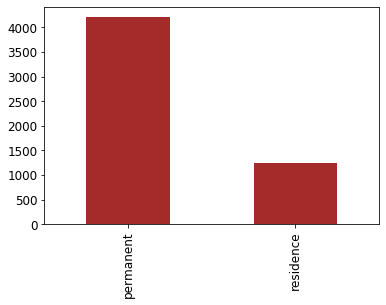

In [65]:
data["Address_type"].value_counts().plot(kind='bar',color='brown')

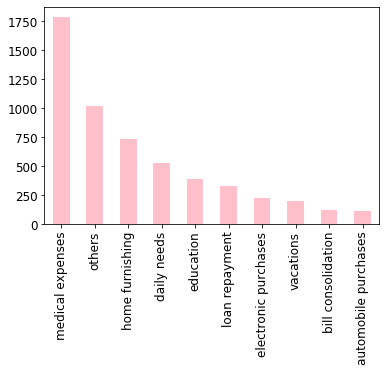

In [66]:
data["LOAN_PURPOSE"].value_counts().plot(kind='bar',color='pink')

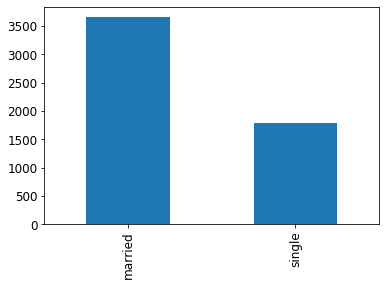

In [67]:
data["MARITAL_STATUS"].value_counts().plot(kind='bar')#,color='')

In [68]:
data["Address_type"].value_counts()

permanent    4208
residence    1237
Name: Address_type, dtype: int64

In [69]:
data["DATE_OF_BIRTH"].value_counts()

1989-01-01 00:00:00    10
1991-11-10 00:00:00     9
1994-01-01 00:00:00     9
1990-01-01 00:00:00     9
1993-01-01 00:00:00     8
                       ..
1995-10-12 00:00:00     1
1986-06-05 00:00:00     1
1993-01-13 00:00:00     1
1970-02-19 00:00:00     1
1980-07-09 00:00:00     1
Name: DATE_OF_BIRTH, Length: 2974, dtype: int64

In [70]:
year=[]
month=[]
day=[]
for i in range(0,len(data)):
    data["DATE_OF_BIRTH"][i]=data["DATE_OF_BIRTH"][i][:10]
   
    if "/" not in data["DATE_OF_BIRTH"][i]:
    
        year.append(int(data["DATE_OF_BIRTH"][i][:4]))
        month.append(int(data["DATE_OF_BIRTH"][i][5:7]))
        day.append(int(data["DATE_OF_BIRTH"][i][8:]))
        
    elif "/" in list(data["DATE_OF_BIRTH"])[i]:
        
        year.append(int(data["DATE_OF_BIRTH"][i][6:]))
        month.append(int(data["DATE_OF_BIRTH"][i][3:5]))
        day.append(int(data["DATE_OF_BIRTH"][i][:2]))
        

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [71]:
from datetime import date 
  
def calculateAge(birthDate): 
    today = date.today() 
    age = today.year - birthDate.year - ((today.month, today.day) < (birthDate.month, birthDate.day)) 
  
    return age 
      
# Driver code 
age=[]
for i in range(0,len(data)):
    age.append(calculateAge(date(year[i],month[i],day[i])))
    
#print(calculateAge(date(1998,12 , 21)), "years") 

In [72]:
#age

In [73]:
data["Age"]=age

In [74]:
age_range=[]
for i in range(0,len(age)):
    if age[i]>=20 and age[i]<=30:
        age_range.append("20-30")
    if age[i]>30 and age[i]<=40:
        age_range.append("30-40")
    if age[i]>40 and age[i]<=50:
        age_range.append("40-50")
    if age[i]>50 and age[i]<=60:
        age_range.append("50-60")
    if age[i]>60 and age[i]<=70:
        age_range.append("60-70")


Text(0, 0.5, 'Number of loans')

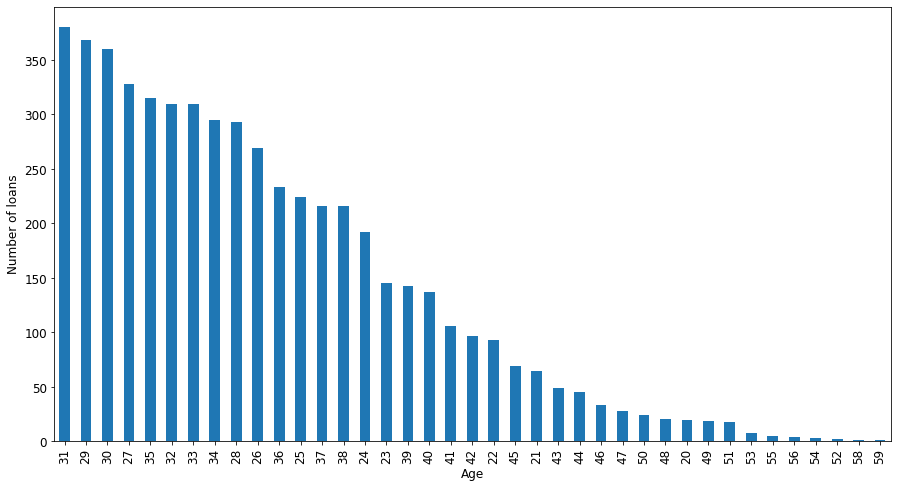

In [75]:
data["Age"].value_counts().plot(kind='bar',figsize=(15,8))
plt.xlabel("Age")
plt.ylabel("Number of loans")

In [76]:
data["Age_range"]=age_range

Text(0, 0.5, 'Number of loans')

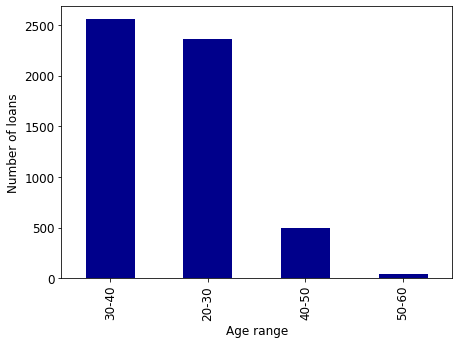

In [77]:
data["Age_range"].value_counts().plot(kind='bar',figsize=(7,5),color="darkblue")
plt.xlabel("Age range")
plt.ylabel("Number of loans")

In [78]:
#sns.swarmplot(x="Age range",y="LOAN STATUS",hue='GENDER',data=data,palette="Set1", dodge=True)

Text(0.5, 0, 'Number of loans')

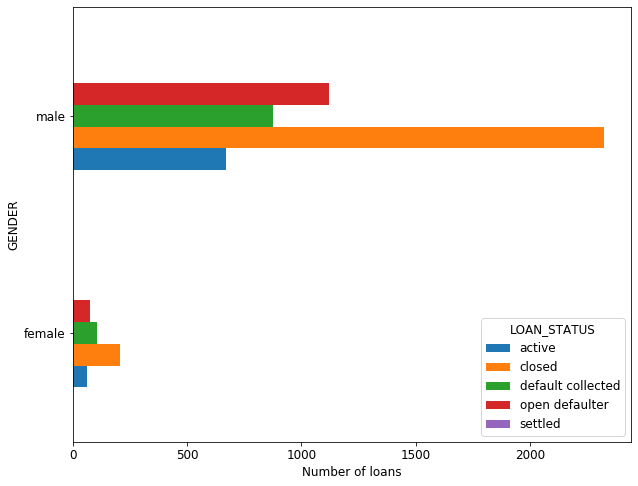

In [79]:
data.groupby('LOAN_STATUS').GENDER.value_counts().unstack(0).plot.barh(figsize=(10,8))
plt.xlabel("Number of loans")

Text(0.5, 0, 'Number of loans')

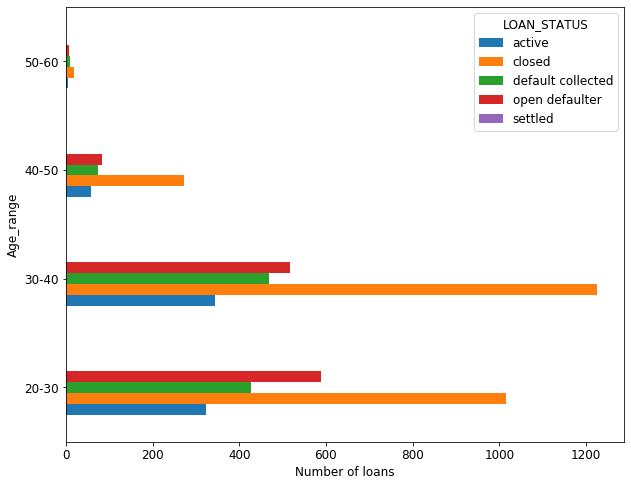

In [80]:
data.groupby('LOAN_STATUS').Age_range.value_counts().unstack(0).plot.barh(figsize=(10,8))
plt.xlabel("Number of loans")

Text(0.5, 0, 'Number of loans')

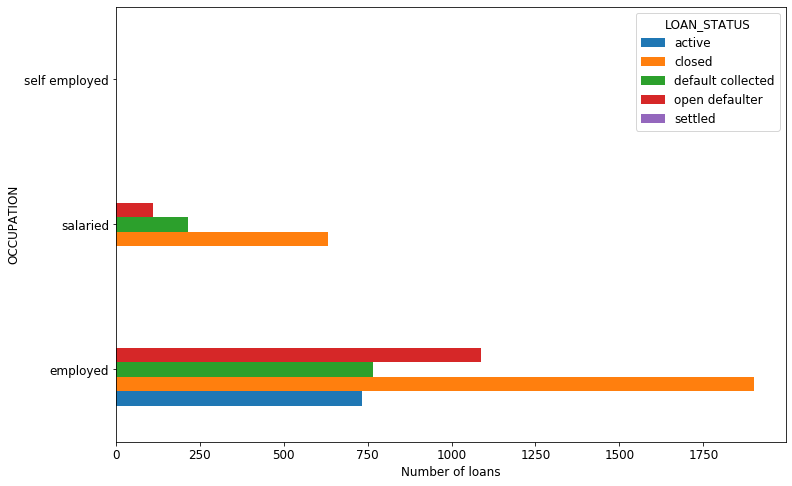

In [81]:
data.groupby('LOAN_STATUS').OCCUPATION.value_counts().unstack(0).plot.barh(figsize=(12,8))
plt.xlabel("Number of loans")

In [82]:
income_range=[]
for i in range(0,len(data)):
    if data["NET_MONTHLY_INCOME"][i]>=10000 and data["NET_MONTHLY_INCOME"][i]<50000:
        income_range.append("10k-50k")
    if data["NET_MONTHLY_INCOME"][i]>=50000 and data["NET_MONTHLY_INCOME"][i]<100000:
        income_range.append("50k-1lakh")
    if data["NET_MONTHLY_INCOME"][i]>=100000 and data["NET_MONTHLY_INCOME"][i]<150000:
        income_range.append("1-1.5lakh")
    if data["NET_MONTHLY_INCOME"][i]>=150000 and data["NET_MONTHLY_INCOME"][i]<200000:
        income_range.append("1.5-2lakh")
    if data["NET_MONTHLY_INCOME"][i]>=200000 and data["NET_MONTHLY_INCOME"][i]<250000:
        income_range.append("2-2.5lakh")
    if data["NET_MONTHLY_INCOME"][i]>=250000 and data["NET_MONTHLY_INCOME"][i]<300000:
        income_range.append("2.5-3lakh")
    if data["NET_MONTHLY_INCOME"][i]>=300000 and data["NET_MONTHLY_INCOME"][i]<400000:
        income_range.append("3-4lakh")
    if data["NET_MONTHLY_INCOME"][i]>=400000 and data["NET_MONTHLY_INCOME"][i]<500000:
        income_range.append("4-5lakh")
    if data["NET_MONTHLY_INCOME"][i]>=500000 and data["NET_MONTHLY_INCOME"][i]<600000:
        income_range.append("5-6lakh")
    if data["NET_MONTHLY_INCOME"][i]>=600000 and data["NET_MONTHLY_INCOME"][i]<700000:
        income_range.append("6-7lakh")
    if data["NET_MONTHLY_INCOME"][i]>=700000 and data["NET_MONTHLY_INCOME"][i]<800000:
        income_range.append("7-8lakh")
    if data["NET_MONTHLY_INCOME"][i]>=800000 and data["NET_MONTHLY_INCOME"][i]<900000:
        income_range.append("8-9lakh")
    if data["NET_MONTHLY_INCOME"][i]>=900000 and data["NET_MONTHLY_INCOME"][i]<1000000:
        income_range.append("9-10lakh")
    if data["NET_MONTHLY_INCOME"][i]>=1000000 and data["NET_MONTHLY_INCOME"][i]<1300000:
        income_range.append("10-13lakh")
 


In [83]:
data["Income_range"]=income_range
set(list(data["Income_range"]))

{'1-1.5lakh',
 '1.5-2lakh',
 '10-13lakh',
 '10k-50k',
 '2-2.5lakh',
 '2.5-3lakh',
 '3-4lakh',
 '4-5lakh',
 '5-6lakh',
 '50k-1lakh'}

Text(0.5, 0, 'Number of loans')

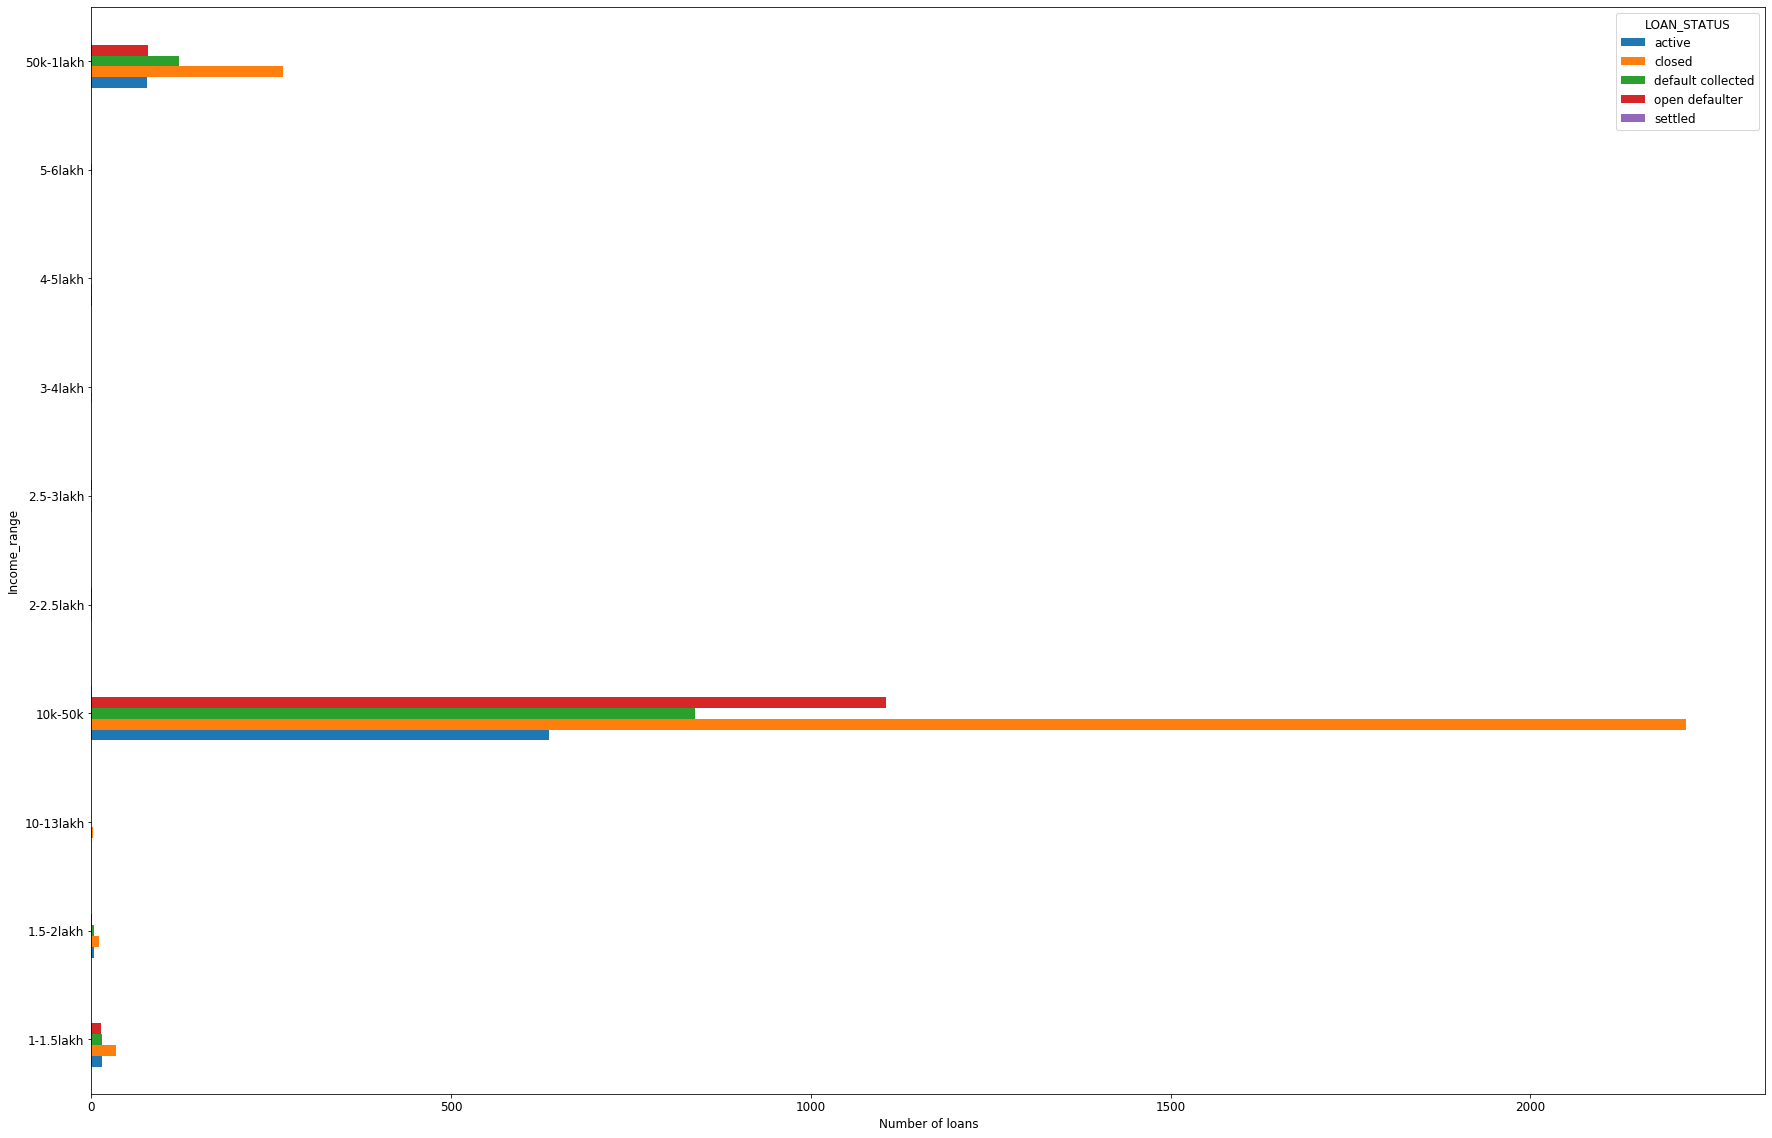

In [84]:
data.groupby('LOAN_STATUS').Income_range.value_counts().unstack(0).plot.barh(figsize=(30,20))
plt.xlabel("Number of loans")

In [85]:
" bfgf ".strip()

'bfgf'

In [86]:
for i in range(0,len(data)):
    #data["CUSTOMER'S_BANK_NAME"][i]=data["CUSTOMER'S_BANK_NAME"][i].strip()
    if "citi" in data["CUSTOMER'S_BANK_NAME"][i]:
        data["CUSTOMER'S_BANK_NAME"][i]="citi bank"
        
    if "hdfc" in data["CUSTOMER'S_BANK_NAME"][i]:
        data["CUSTOMER'S_BANK_NAME"][i]="hdfc bank"
    
    if "icici" in data["CUSTOMER'S_BANK_NAME"][i]:
        data["CUSTOMER'S_BANK_NAME"][i]="icici bank"
        
    if "kotak" in data["CUSTOMER'S_BANK_NAME"][i]:
        data["CUSTOMER'S_BANK_NAME"][i]="kotak mahindra bank"
    
    if "idfc" in data["CUSTOMER'S_BANK_NAME"][i]:
        data["CUSTOMER'S_BANK_NAME"][i]="idfc bank"
        
    if "idbi" in data["CUSTOMER'S_BANK_NAME"][i]:
        data["CUSTOMER'S_BANK_NAME"][i]="idbi bank"
       
    if "karnataka" in data["CUSTOMER'S_BANK_NAME"][i]:
        data["CUSTOMER'S_BANK_NAME"][i]="karnataka bank"
        
    if "city" in data["CUSTOMER'S_BANK_NAME"][i]:
        data["CUSTOMER'S_BANK_NAME"][i]="city union bank"

    
    if "rbl" in data["CUSTOMER'S_BANK_NAME"][i]:
        data["CUSTOMER'S_BANK_NAME"][i]="rbl bank"
        
    if "ujjivan" in data["CUSTOMER'S_BANK_NAME"][i]:
        data["CUSTOMER'S_BANK_NAME"][i]="ujjivan small finance bank"
    
    if "bharat" in data["CUSTOMER'S_BANK_NAME"][i]:
        data["CUSTOMER'S_BANK_NAME"][i]="bharat bank"
        
    if "au small" in data["CUSTOMER'S_BANK_NAME"][i]:
        data["CUSTOMER'S_BANK_NAME"][i]="au small finance bank"
        
    if "zoroastrian" in data["CUSTOMER'S_BANK_NAME"][i]:
        data["CUSTOMER'S_BANK_NAME"][i]="the zoroastrian co-operative bank ltd."
       

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:



In [87]:
set(list(data["CUSTOMER'S_BANK_NAME"]))

{'akhand anand co.op bank ltd.',
 'allahabad bank',
 'andhra bank',
 'au small finance bank',
 'axis bank',
 'bandhan bank limited',
 'bank of baroda',
 'bank of india',
 'bank of maharashtra',
 'bharat bank',
 'canara bank',
 'catholic syrian bank',
 'central bank of india',
 'citi bank',
 'city union bank',
 'corporation bank',
 'dbs bank ltd',
 'dena bank',
 'equitas small finance bank ltd.',
 'federal bank',
 'hdfc bank',
 'hsbc bank',
 'icici bank',
 'idbi bank',
 'idfc bank',
 'indian bank',
 'indian overseas bank',
 'indusind bank',
 'jana small finance bank',
 'karnataka bank',
 'karur vysya bank',
 'kotak mahindra bank',
 'lakshmi vilas bank',
 'oriental bank of commerce',
 'paytm payments bank ltd',
 'punjab & maharashtra co-op bank ltd(pmc)',
 'punjab national bank',
 'ratnakar bank',
 'rbl bank',
 'south indian bank',
 'standard chartered bank',
 'state bank of india',
 'syndicate bank',
 'tamilnad mercantile bank ltd.',
 'the zoroastrian co-operative bank ltd.',
 'ujjivan 

Text(0.5, 0, 'Number of loans')

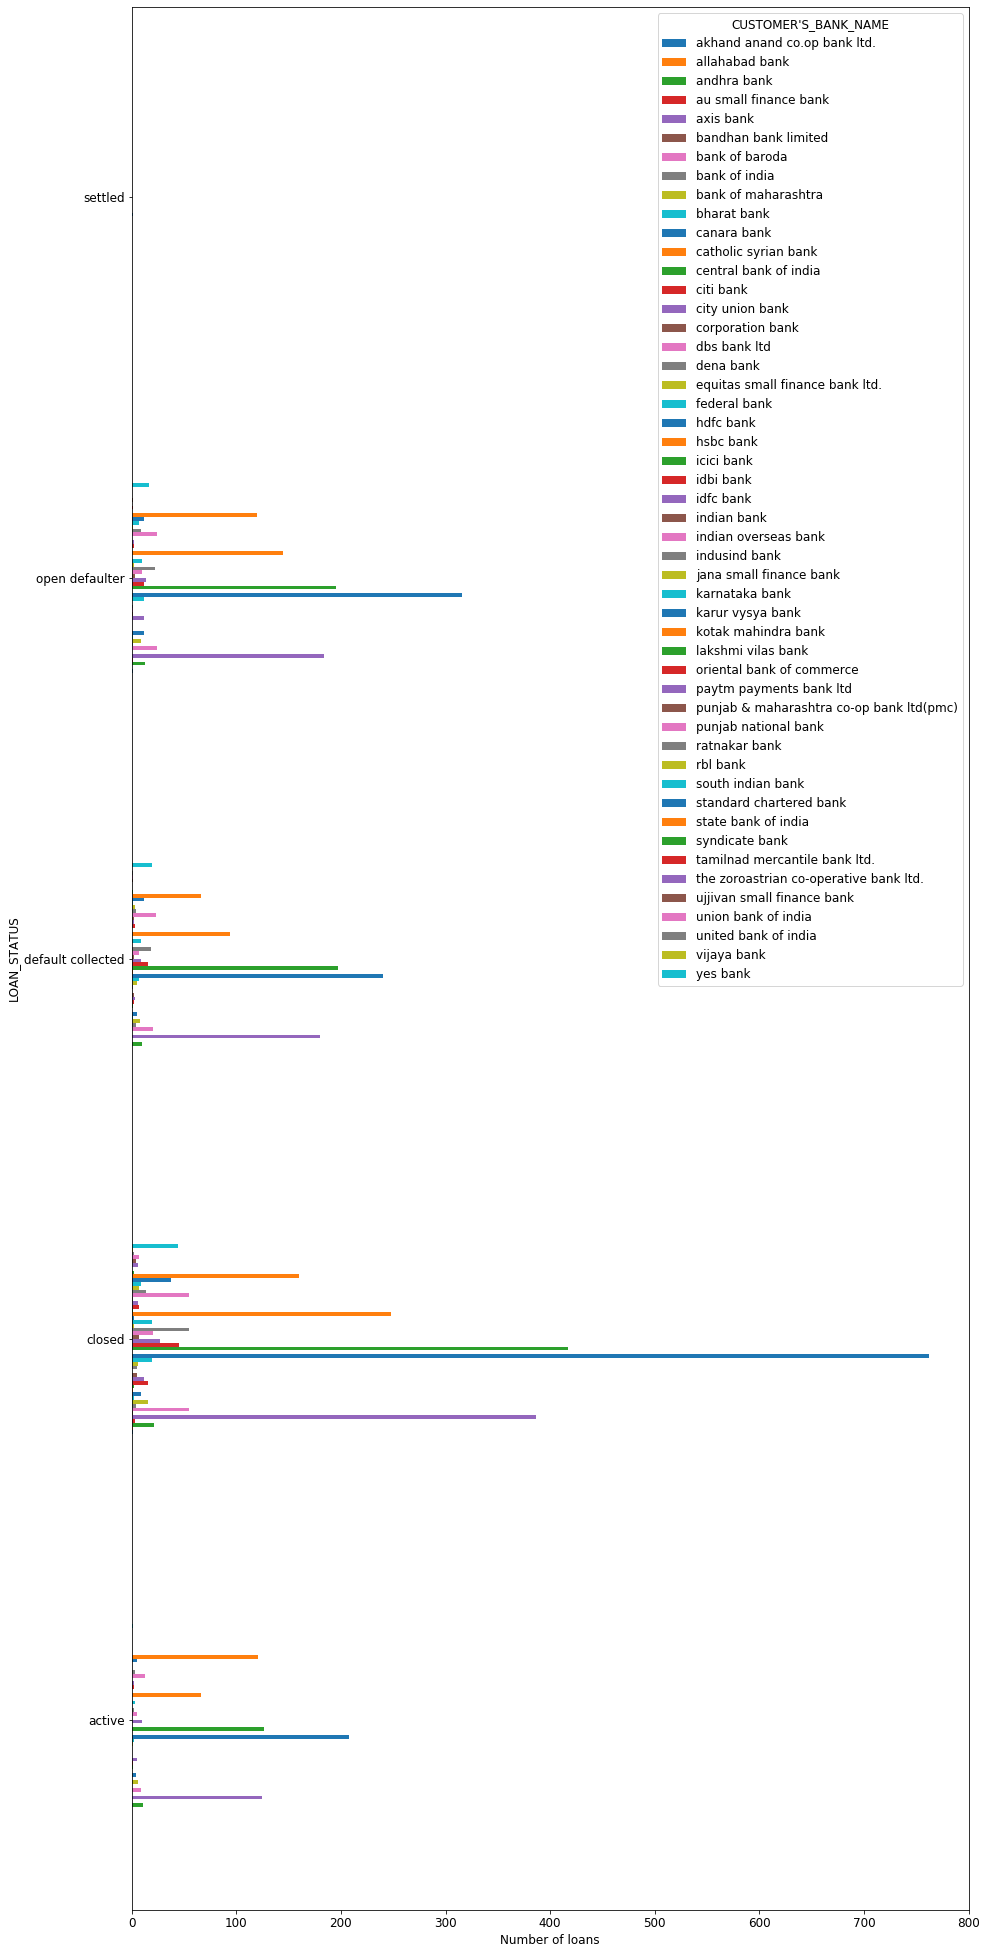

In [88]:
data.groupby("CUSTOMER'S_BANK_NAME").LOAN_STATUS.value_counts().unstack(0).plot.barh(figsize=(15,35))
plt.xlabel("Number of loans")

In [89]:
#data["CUSTOMER'S_BANK_NAME"].value_counts()

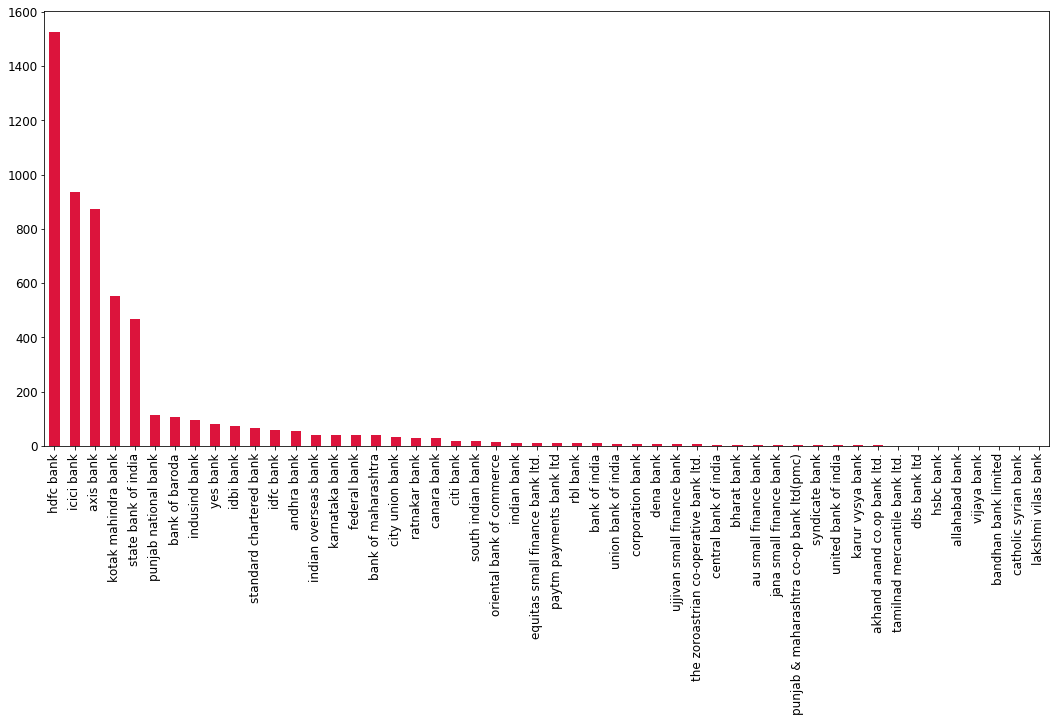

In [90]:
data["CUSTOMER'S_BANK_NAME"].value_counts().plot(kind="bar",figsize=(18,8),color="crimson")

In [91]:
data["Type_of_Application_"]=data["Type_of_Application_"].str.replace(" ","")

In [92]:
l

['SR NO.',
 'LOAN STATUS',
 'DATE',
 'LOAN ID',
 'APPLICANT FIRST NAME',
 'APPLICANT LAST NAME',
 'LOAN AMOUNT',
 'Loan Term ',
 'Interest Type',
 'INTEREST RATE',
 'INTEREST AMOUNT',
 'EMI AMOUNT',
 'PROCESSING FEES',
 'GST (18%)',
 'Pre-emi interest',
 'DISBURSED AMOUNT',
 'Mode of Disbursement',
 'DATE OF DISBURSEMENT',
 'No. of Installments',
 'EMI DUE DATE',
 'EMI END DATE',
 'Lender',
 'Bounce Charges (BC)',
 'GST ON BC',
 'EMI-1 COLLECTION STATUS',
 'EMI-1COLLECTED AMOUNT',
 'COLLECTION DATE-1',
 'EMI Date-1',
 'Defaulter Tenure (DT)-1',
 'Interest Charged (IC)-1',
 'GST ON IC-1',
 'Total Repayment-1',
 'EMI-2 COLLECTION STATUS',
 'EMI-2 COLLECTED AMOUNT',
 'COLLECTION DATE-2',
 'EMI Date-2',
 'Defaulter Tenure (DT)-2',
 'Interest Charged (IC)-2',
 'GST ON IC-2',
 'Total Repayment-2',
 'EMI-3 COLLECTION STATUS',
 'EMI-3 COLLECTED AMOUNT',
 'COLLECTION DATE-3',
 'EMI Date-3',
 'Defaulter Tenure (DT)-3',
 'Interest Charged (IC)-3',
 'GST ON IC-3',
 'Total Repayment-3',
 'Total Col

In [93]:
data["LOAN_STATUS"].value_counts()

closed               2533
open defaulter       1198
default collected     981
active                732
settled                 1
Name: LOAN_STATUS, dtype: int64

In [94]:
df1["EMI-1 COLLECTION STATUS"].value_counts()

collected    4638
failed       1243
Name: EMI-1 COLLECTION STATUS, dtype: int64

In [95]:
for i in range(0,len(data)):
    data["INTEREST_RATE"][i]=int(36)

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [96]:
l

['SR NO.',
 'LOAN STATUS',
 'DATE',
 'LOAN ID',
 'APPLICANT FIRST NAME',
 'APPLICANT LAST NAME',
 'LOAN AMOUNT',
 'Loan Term ',
 'Interest Type',
 'INTEREST RATE',
 'INTEREST AMOUNT',
 'EMI AMOUNT',
 'PROCESSING FEES',
 'GST (18%)',
 'Pre-emi interest',
 'DISBURSED AMOUNT',
 'Mode of Disbursement',
 'DATE OF DISBURSEMENT',
 'No. of Installments',
 'EMI DUE DATE',
 'EMI END DATE',
 'Lender',
 'Bounce Charges (BC)',
 'GST ON BC',
 'EMI-1 COLLECTION STATUS',
 'EMI-1COLLECTED AMOUNT',
 'COLLECTION DATE-1',
 'EMI Date-1',
 'Defaulter Tenure (DT)-1',
 'Interest Charged (IC)-1',
 'GST ON IC-1',
 'Total Repayment-1',
 'EMI-2 COLLECTION STATUS',
 'EMI-2 COLLECTED AMOUNT',
 'COLLECTION DATE-2',
 'EMI Date-2',
 'Defaulter Tenure (DT)-2',
 'Interest Charged (IC)-2',
 'GST ON IC-2',
 'Total Repayment-2',
 'EMI-3 COLLECTION STATUS',
 'EMI-3 COLLECTED AMOUNT',
 'COLLECTION DATE-3',
 'EMI Date-3',
 'Defaulter Tenure (DT)-3',
 'Interest Charged (IC)-3',
 'GST ON IC-3',
 'Total Repayment-3',
 'Total Col

In [383]:
#set(data["COMPANY_NAME"])#.value_counts()

In [98]:
data["Pre-emi_interest"].value_counts()

0    5445
Name: Pre-emi_interest, dtype: int64

In [99]:
len(set(data["COMPANY_NAME"]))

3566

In [100]:
#data1["Mode_of_Disbursement"].value_counts()

In [101]:
#set(list(df2["CITY"]))

In [384]:
for i in range(0,len(data)):
    data["CITY"][i]=data["CITY"][i].strip()
#set(list(data["CITY"]))

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [103]:
for i in range(0,len(data)):
    
    
    if "bengal" in data["CITY"][i]:
        data["CITY"][i]="bangalore"
    if "bang" in data["CITY"][i]:
        data["CITY"][i]="bangalore"
    if "banag" in data["CITY"][i]:
        data["CITY"][i]="bangalore"
    
    if "ahem" in data["CITY"][i]:
        data["CITY"][i]="ahmedabad"
    if "ahmeda" in data["CITY"][i]:
        data["CITY"][i]="ahmedabad"
    if "ahma" in data["CITY"][i]:
        data["CITY"][i]="ahmedabad"
    if "ahmednagar" in data["CITY"][i]:
        data["CITY"][i]="ahmednagar"
    if "alapp" in data["CITY"][i]:
        data["CITY"][i]="alappuzha"
    if "ambarnath" in data["CITY"][i]:
        data["CITY"][i]="ambernath"
    if "amrav" in data["CITY"][i]:
        data["CITY"][i]="amravati"
    if data["CITY"][i]=="ahe":
        data["CITY"][i]="ahmedabad"
        
    if "aurangabad" in data["CITY"][i]:
        data["CITY"][i]="aurangabad"
    if "badlapur" in data["CITY"][i]:
        data["CITY"][i]="badlapur"
    if "alapp" in data["CITY"][i]:
        data["CITY"][i]="alappuzha"
        
    if "bhavnagar" in data["CITY"][i]:
        data["CITY"][i]="bhavnagar"
    if "billimora" in data["CITY"][i]:
        data["CITY"][i]="bilimora"
    if "chennai" in data["CITY"][i]:
        data["CITY"][i]="chennai"
    if "dehli" in data["CITY"][i]:
        data["CITY"][i]="delhi"
    if "delh" in data["CITY"][i]:
        data["CITY"][i]="delhi"
    
        
    if "dombivli" in data["CITY"][i]:
        data["CITY"][i]="dombivali"
    if "gandhidam" in data["CITY"][i]:
        data["CITY"][i]="gandhidham"
    if "gautam" in data["CITY"][i]:
        data["CITY"][i]="gautambudh nagar"
    if "ghandhdham" in data["CITY"][i]:
        data["CITY"][i]="gandhidham"
    if "ghazibad" in data["CITY"][i]:
        data["CITY"][i]="ghaziabad"    
        
    
    if "gotam" in data["CITY"][i]:
        data["CITY"][i]="gautambudh nagar"
    if "noida" in data["CITY"][i]:
        data["CITY"][i]="noida"
    if "hanuma" in data["CITY"][i]:
        data["CITY"][i]="hanumangarh"
    if "hyd" in data["CITY"][i]:
        data["CITY"][i]="hyderabad"   
    
    if "indore" in data["CITY"][i]:
        data["CITY"][i]="indore"
    if "jaipur" in data["CITY"][i]:
        data["CITY"][i]="jaipur"
    if "jajapur" in data["CITY"][i]:
        data["CITY"][i]="jajpur"
    if "jamnaga" in data["CITY"][i]:
        data["CITY"][i]="jamnagar"
        
    if "kalyan" in data["CITY"][i]:
        data["CITY"][i]="kalyan"
    if "kanpur" in data["CITY"][i]:
        data["CITY"][i]="kanpur"
    if "kochi" in data["CITY"][i]:
        data["CITY"][i]="kochi"
    if "kolkata" in data["CITY"][i]:
        data["CITY"][i]="kolkata"
    if "kurn" in data["CITY"][i]:
        data["CITY"][i]="kurnool"
    if "ludhiana" in data["CITY"][i]:
        data["CITY"][i]="ludhiana"
        
    if "modi" in data["CITY"][i]:
        data["CITY"][i]="modinagar"
    if "mul" in data["CITY"][i]:
        data["CITY"][i]="mumbai"
    if "mum" in data["CITY"][i]:
        data["CITY"][i]="mumbai"
    if "nagpur" in data["CITY"][i]:
        data["CITY"][i]="nagpur"
     
    if "nande" in data["CITY"][i]:
        data["CITY"][i]="nanded"
    if "nasik" in data["CITY"][i]:
        data["CITY"][i]="nashik"
    if "mumbai" in data["CITY"][i]:
        data["CITY"][i]="mumbai"
    if "navi" in data["CITY"][i]:
        data["CITY"][i]="mumbai"
    if "goa" in data["CITY"][i]:
        data["CITY"][i]="goa"
        
    if "pimpri-chinchwad" in data["CITY"][i]:
        data["CITY"][i]="pimpri chinchwad"
    if "puduk" in data["CITY"][i]:
        data["CITY"][i]="pudukottai"
    if "pune" in data["CITY"][i]:
        data["CITY"][i]="pune"
        
    if "thane" in data["CITY"][i]:
        data["CITY"][i]="thane"
    if "suryapet" in data["CITY"][i]:
        data["CITY"][i]="suryapeta"
    if "surendranagar" in data["CITY"][i]:
        data["CITY"][i]="surendrnagar"
    if "secunder" in data["CITY"][i]:
        data["CITY"][i]="secunderbad"
    if "purnea" in data["CITY"][i]:
        data["CITY"][i]="purnia"
    if "raiga" in data["CITY"][i]:
        data["CITY"][i]="raigarh"
    if "nawa" in data["CITY"][i]:
        data["CITY"][i]="nawada"
    if "nizamanad" in data["CITY"][i]:
        data["CITY"][i]="nizamabad"
        
    if "lakhimpur" in data["CITY"][i]:
        data["CITY"][i]="lakhimpur"
    if "nilgiris" in data["CITY"][i]:
        data["CITY"][i]="nilgiris"
   
    if "thiruvanthapuram" in data["CITY"][i]:
        data["CITY"][i]="thiruvananthapuram"
    if "vadodara" in data["CITY"][i]:
        data["CITY"][i]="vadodara"
    if "tiruchira" in data["CITY"][i]:
        data["CITY"][i]="trichy"
    if "tiruppur" in data["CITY"][i]:
        data["CITY"][i]="tirupur"
    if "trivandrum" in data["CITY"][i]:
        data["CITY"][i]="trivandrum"
    if "vasai" in data["CITY"][i]:
        data["CITY"][i]="vasai"
    if "virar" in data["CITY"][i]:
        data["CITY"][i]="virar"
    if "vishak" in data["CITY"][i]:
        data["CITY"][i]="vizag"
    if "vishka" in data["CITY"][i]:
        data["CITY"][i]="vizag"
    if "visak" in data["CITY"][i]:
        data["CITY"][i]="vizag"
    if "viskha" in data["CITY"][i]:
        data["CITY"][i]="vizag"
    if "godavari" in data["CITY"][i]:
        data["CITY"][i]="godavari"
    
    if "122" in data["CITY"][i]:
        data["CITY"][i]="gurgaon"
    if "400" in data["CITY"][i]:
        data["CITY"][i]="thane"
    if "495" in data["CITY"][i]:
        data["CITY"][i]="bilaspur"
    if "560" in data["CITY"][i]:
        data["CITY"][i]="bangalore"
    if "562" in data["CITY"][i]:
        data["CITY"][i]="ramanagar"
    if "673" in data["CITY"][i]:
        data["CITY"][i]="kozhikode"
        
    if "aska" in data["CITY"][i]:
        data["CITY"][i]="ganjam"
    if "gurugram" in data["CITY"][i]:
        data["CITY"][i]="gurgaon"
    if "khurdha" in data["CITY"][i]:
        data["CITY"][i]="khordha"
    if "khorda" in data["CITY"][i]:
        data["CITY"][i]="khordha"
    if "kolar" in data["CITY"][i]:
        data["CITY"][i]="kolar"
    if "mahabubnagar" in data["CITY"][i]:
        data["CITY"][i]="mahbubnagar"
    if "mahaboob nagar" in data["CITY"][i]:
        data["CITY"][i]="mahbubnagar"
    if "mysore" in data["CITY"][i]:
        data["CITY"][i]="mysuru"
    if "rajahmudry" in data["CITY"][i]:
        data["CITY"][i]="rajahmundry"
    if "rajamundry" in data["CITY"][i]:
        data["CITY"][i]="rajahmundry"
    if "ramanagar" in data["CITY"][i]:
        data["CITY"][i]="ramanagar"
    if "solapur" in data["CITY"][i]:
        data["CITY"][i]="solapur"
    if "vallur" in data["CITY"][i]:
        data["CITY"][i]="thiruvallur"
    if "aura" in data["CITY"][i]:
        data["CITY"][i]="aurangabad"

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:95: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:104: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:118: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning

In [104]:
#set(list(data["CITY"]))

In [105]:
len(set(list(data["CITY"])))

554

In [106]:
data["NO_OF_YEARS_IN_CURRENT_JOB"]=data["NO_OF_YEARS_IN_CURRENT_JOB"].str.replace(' years','')
data["NO_OF_YEARS_IN_CURRENT_JOB"]=data["NO_OF_YEARS_IN_CURRENT_JOB"].str.replace(' year','')
data["NO_OF_YEARS_IN_CURRENT_JOB"]=data["NO_OF_YEARS_IN_CURRENT_JOB"].str.replace('years','')
data["NO_OF_YEARS_IN_CURRENT_JOB"]=data["NO_OF_YEARS_IN_CURRENT_JOB"].str.replace('7 months','')
data["NO_OF_YEARS_IN_CURRENT_JOB"]=data["NO_OF_YEARS_IN_CURRENT_JOB"].str.replace('5 months','0')
data["NO_OF_YEARS_IN_CURRENT_JOB"]=data["NO_OF_YEARS_IN_CURRENT_JOB"].str.replace('nan','0')

In [107]:
data["NO_OF_YEARS_IN_CURRENT_JOB"]=data["NO_OF_YEARS_IN_CURRENT_JOB"].astype('int64')

In [108]:
#set(data["NO_OF_YEARS_IN_CURRENT_JOB"])

In [127]:
set(data["LOAN_AMOUNT"])#.value_counts()

{2000,
 2500,
 3000,
 4000,
 5000,
 6000,
 7000,
 8000,
 9000,
 10000,
 11000,
 12000,
 13000,
 14000,
 15000}

In [110]:
data["Loan_Term_"]=data["Loan_Term_"].astype("int64")
data["INTEREST_AMOUNT"]=data["INTEREST_AMOUNT"].astype("int64")
data["EMI_AMOUNT"]=data["EMI_AMOUNT"].astype("int64")
data["PROCESSING_FEES"]=data["PROCESSING_FEES"].astype("float64")
data["GST_(18%)"]=data["GST_(18%)"].astype("float64")
data["Bounce_Charges_(BC)"]=data["Bounce_Charges_(BC)"].astype("int64")
data["GST_ON_BC"]=data["GST_ON_BC"].astype("int64")
data["DISBURSED_AMOUNT"]=data["DISBURSED_AMOUNT"].astype("int64")

In [129]:
#data["LOAN_PURPOSE"]=data["LOAN_PURPOSE"].str.replace("nan","daily needs")
#set(data["COLLECTION_DATE-1"])#
data["LOAN_PURPOSE"].value_counts()

medical expenses        1788
others                  1016
home furnishing          736
daily needs              524
education                393
loan repayment           331
electronic purchases     227
vacations                196
bill consolidation       122
automobile purchases     112
Name: LOAN_PURPOSE, dtype: int64

In [112]:
data["CREDIT_SCORE"]=data["CREDIT_SCORE"].astype("int64")
data["CREDIT_SCORE"].value_counts()

755    204
671    181
760    142
728     87
6       81
      ... 
568      1
560      1
806      1
319      1
819      1
Name: CREDIT_SCORE, Length: 412, dtype: int64

In [113]:
data["Mode_of_Disbursement"].value_counts()

imps    5404
neft      41
Name: Mode_of_Disbursement, dtype: int64

In [114]:
#data["Customer_bank_account_type"].value_counts()

In [115]:
#data1["COLLECTION_DATE-1"]=data1["COLLECTION_DATE-1"].str.replace('202020','2020')
data["Mode_of_Disbursement"]=data["Mode_of_Disbursement"].str.replace("nan","imps")

In [116]:
data["Loan_Tenure_unit"].value_counts()

months     5320
monthly     125
Name: Loan_Tenure_unit, dtype: int64

In [117]:
data=data.drop(['SR_NO','DATE', 'LOAN_ID', 'APPLICANT_FIRST_NAME','APPLICANT_LAST_NAME','Interest_Type','INTEREST_RATE',
            'DATE_OF_DISBURSEMENT', 'EMI_DUE_DATE','EMI_END_DATE','Pre-emi_interest',
            'EMI-1_COLLECTION_STATUS','EMI-1COLLECTED_AMOUNT','Defaulter_Tenure_(DT)-1','Bounce_Charges_(BC)', 'GST_ON_BC',
            'COLLECTION_DATE-1', 'EMI_Date-1','Interest_Charged_(IC)-1','GST_ON_IC-1', 'Total_Repayment-1','EMI-2_COLLECTION_STATUS','EMI-2_COLLECTED_AMOUNT',
            'COLLECTION_DATE-2', 'EMI_Date-2','Defaulter_Tenure_(DT)-2', 'Interest_Charged_(IC)-2', 'GST_ON_IC-2',
            'Total_Repayment-2', 'EMI-3_COLLECTION_STATUS','EMI-3_COLLECTED_AMOUNT', 'COLLECTION_DATE-3', 'EMI_Date-3',
            'Defaulter_Tenure_(DT)-3', 'Interest_Charged_(IC)-3', 'GST_ON_IC-3','Total_Repayment-3','Total_Collected', 
            'REMARKS', 'Policy_ID','Refund_Amount','DATE_OF_BIRTH','Address_type','PERMANENT_RESIDENTIAL_ADDRESS_',
            'CURRENT_RESIDENTIAL_ADDRESS_(IF_DIFFERENT_THAN_KYC)','PIN_CODE','COMPANY_NAME', 'COMPANY_ADDRESS/LOCATION',
            'Payment_Frequency','Loan_Tenure_unit','Customer_bank_account_type','NAME_OF_THE_REFERENCE_1', 'CONTACT_NUMBER_',
            'NAME_OF_THE_REFERENCE_2','CONTACT_NUMBER','Age_range', 'Income_range'], axis=1)

In [118]:
data.columns

Index(['LOAN_STATUS', 'LOAN_AMOUNT', 'Loan_Term_', 'INTEREST_AMOUNT',
       'EMI_AMOUNT', 'PROCESSING_FEES', 'GST_(18%)', 'DISBURSED_AMOUNT',
       'Mode_of_Disbursement', 'Lender', 'Type_of_Application_', 'GENDER',
       'MARITAL_STATUS', 'RESIDENTIAL_STATUS-OWNED/RENTED', 'STATE', 'CITY',
       'OCCUPATION', 'NO_OF_YEARS_IN_CURRENT_JOB',
       'COMPANY_DESIGNATION_-_MANAGER,_WORKER,_SUPERVISOR',
       'NET_MONTHLY_INCOME', 'MODE_OF_SALARY_-_CHEQUE,_NEFT,_FUND_TRANSFER',
       'CREDIT_SCORE', 'LOAN_PURPOSE', 'CUSTOMER'S_BANK_NAME', 'Age'],
      dtype='object')

In [119]:
data["LOAN_STATUS"]=data["LOAN_STATUS"].str.replace("settled","default collected")
data["LOAN_STATUS"].value_counts()

closed               2533
open defaulter       1198
default collected     982
active                732
Name: LOAN_STATUS, dtype: int64

In [120]:

#data=data[data.No_of_Installments!='1']
data1=data[data.LOAN_STATUS != 'active']
df=data
df_active=data[data.LOAN_STATUS == 'active']

In [385]:
# datetime(year, month, day, hour, minute, second) 
#pd.to_datetime(data["COLLECTION_DATE-1"])
#Sl=[i for i in range(0,len(data1))]
#data1["Sl"]=Sl
#data1=data1.set_index("Sl") 
#data1=data1.drop([Sl_no], axis=1)
data1=data1.reset_index(drop=True)
len(data1)
#data1

4713

In [386]:
#list(data1["CREDIT_SCORE"])#.value_counts()

In [123]:
data['CREDIT_SCORE'] = data['CREDIT_SCORE'].fillna(data['CREDIT_SCORE'].median())
data = data.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [124]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from scipy.stats import boxcox
from sklearn import preprocessing
#OneHotEncoder().fit_transform(data1)
onehotencoder = OneHotEncoder(categorical_features = [0])
#x = onehotencoder.fit_transform(x).toarray()

In [387]:
d1=pd.get_dummies(data1,drop_first=True)
#list(d1.columns)

In [126]:
X = d1.values
y = data1["LOAN_STATUS"].values

le = preprocessing.LabelEncoder()
le.fit(["open defaulter", "closed", "default collected", "settled"])

list(le.classes_)
#['amsterdam', 'paris', 'tokyo']
y=le.transform(y)
y=y.astype("float64")
set(y)

#Y = keras.utils.to_categorical(Y, num_classes=len(label2id), dtype='float32')

{0.0, 1.0, 2.0}

In [130]:
#splitting dataset into training and testing dataset11

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.10, random_state = 0)

In [131]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#param_grid={'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001]}

#grid=GridSearchCV(SVC(kernel='rbf'),param_grid,verbose=3)
#grid.fit(X_train,y_train)

In [132]:
np.isnan(d1.any()) #and gets False
#np.isfinite(d1.all()) #and gets True
pd.isnull(data1).sum() > 0
#param_grid={'C':[10000,1000],'gamma':[0.001,0.01]}

#grid=GridSearchCV(SVC(kernel='rbf'),param_grid,verbose=3)
#grid.fit(X_train,y_train)

LOAN_STATUS                                          False
LOAN_AMOUNT                                          False
Loan_Term_                                           False
INTEREST_AMOUNT                                      False
EMI_AMOUNT                                           False
PROCESSING_FEES                                      False
GST_(18%)                                            False
DISBURSED_AMOUNT                                     False
Mode_of_Disbursement                                 False
Lender                                               False
Type_of_Application_                                 False
GENDER                                               False
MARITAL_STATUS                                       False
RESIDENTIAL_STATUS-OWNED/RENTED                      False
STATE                                                False
CITY                                                 False
OCCUPATION                                           Fal

In [173]:
param_grid={'C':[1,10],'gamma':[1,10]}

grid=GridSearchCV(SVC(kernel='rbf'),param_grid,verbose=3)
grid.fit(X_train,y_train)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.534, total=  11.3s
[CV] C=1, gamma=1 ....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.2s remaining:    0.0s


[CV] ........................ C=1, gamma=1, score=0.534, total=  11.3s
[CV] C=1, gamma=1 ....................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   22.5s remaining:    0.0s


[CV] ........................ C=1, gamma=1, score=0.534, total=  11.3s
[CV] C=1, gamma=10 ...................................................
[CV] ....................... C=1, gamma=10, score=0.534, total=  11.3s
[CV] C=1, gamma=10 ...................................................
[CV] ....................... C=1, gamma=10, score=0.534, total=  11.3s
[CV] C=1, gamma=10 ...................................................
[CV] ....................... C=1, gamma=10, score=0.534, total=  11.5s
[CV] C=10, gamma=1 ...................................................
[CV] ....................... C=10, gamma=1, score=0.531, total=  11.3s
[CV] C=10, gamma=1 ...................................................
[CV] ....................... C=10, gamma=1, score=0.534, total=  11.4s
[CV] C=10, gamma=1 ...................................................
[CV] ....................... C=10, gamma=1, score=0.534, total=  11.6s
[CV] C=10, gamma=10 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  2.3min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 10], 'gamma': [1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [134]:
param_grid={'C':[0.1],'gamma':[1]}

grid=GridSearchCV(SVC(kernel='rbf'),param_grid,verbose=3)
grid.fit(X_train,y_train)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.536, total=  12.1s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.0s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.536, total=  12.2s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   24.2s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.536, total=  12.1s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   36.3s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None, param_grid={'C': [0.1], 'gamma': [1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [136]:
grid_predictions=grid.predict(X_test)
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

         0.0       0.55      1.00      0.71       261
         1.0       0.00      0.00      0.00       100
         2.0       0.00      0.00      0.00       111

    accuracy                           0.55       472
   macro avg       0.18      0.33      0.24       472
weighted avg       0.31      0.55      0.39       472



C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [137]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, grid_predictions))
grid.best_estimator_

Accuracy: 0.5529661016949152


SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [138]:
from sklearn.model_selection import cross_val_score
#clf = svm.SVC(kernel='linear', C=1)
#scores = cross_val_score(grid, X_train, y_train, cv=5)
#scores

In [139]:
#print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

from sklearn.linear_model import LinearRegression
from sklearn import svm
#regressor = LinearRegression()
#regressor.fit(X_train, y_train)

#y_pred = regressor.predict(X_test)
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
#lin_clf = svm.LinearSVC()

rbf_svc = svm.SVC(kernel='linear')
rbf_svc.fit(X_train,y_train)
#lin_clf.fit(X_train, y_train)
#X, y = datasets.load_iris(return_X_y=True)
#y_pred=OneVsOneClassifier(LinearSVC(random_state=0)).fit(X_train, y_train).predict(X_test)
#y_pred
y_pred =rbf_svc.predict(X_test)

In [140]:
#c=10000,gamma=0.001...........C=100000, gamma=0.001, score=0.572

f_date = date(2014, 7, 2)
l_date = date(2014, 7, 11)
delta = l_date - f_date
print(delta.days)
data1["COLLECTION_DATE-1"][i]=data1["COLLECTION_DATE-1"][i][:10]
    data1["EMI_Date-1"][i]=data1["EMI_Date-1"][i][:10]
    
    if data1["COLLECTION_DATE-1"][i]=="" or data1["COLLECTION_DATE-1"][i]=="0":
        year1.append("2020")
        month1.append("04")
        day1.append("22")
        data1["COLLECTION_DATE-1"][i]="2020-04-22"
        
if data1["COLLECTION_DATE-1"][i][6:].isdigit():
        year1.append(data1["COLLECTION_DATE-1"][i][6:])
        month1.append(data1["COLLECTION_DATE-1"][i][3:5])
        day1.append(data1["COLLECTION_DATE-1"][i][0:2])
        year2.append(data1["EMI_Date-1"][i][6:])
        month2.append(data1["EMI_Date-1"][i][3:5])
        day2.append(data1["EMI_Date-1"][i][0:2])
            
    elif data1["COLLECTION_DATE-1"][i][:4].isdigit():
        year1.append(data1["COLLECTION_DATE-1"][i][:4])
        month1.append(data1["COLLECTION_DATE-1"][i][5:7])
        day1.append(data1["COLLECTION_DATE-1"][i][8:])
        year2.append(data1["EMI_Date-1"][i][:4])
        month2.append(data1["EMI_Date-1"][i][5:7])
        day2.append(data1["EMI_Date-1"][i][8:])
        
    f_late=date(int(year2[i]),int(month2[i]),int(day2))
    l_late=date(int(year1[i]),int(month1[i]),int(day1))   
    delta=l_late-f_late
    delay.append(delta.days)

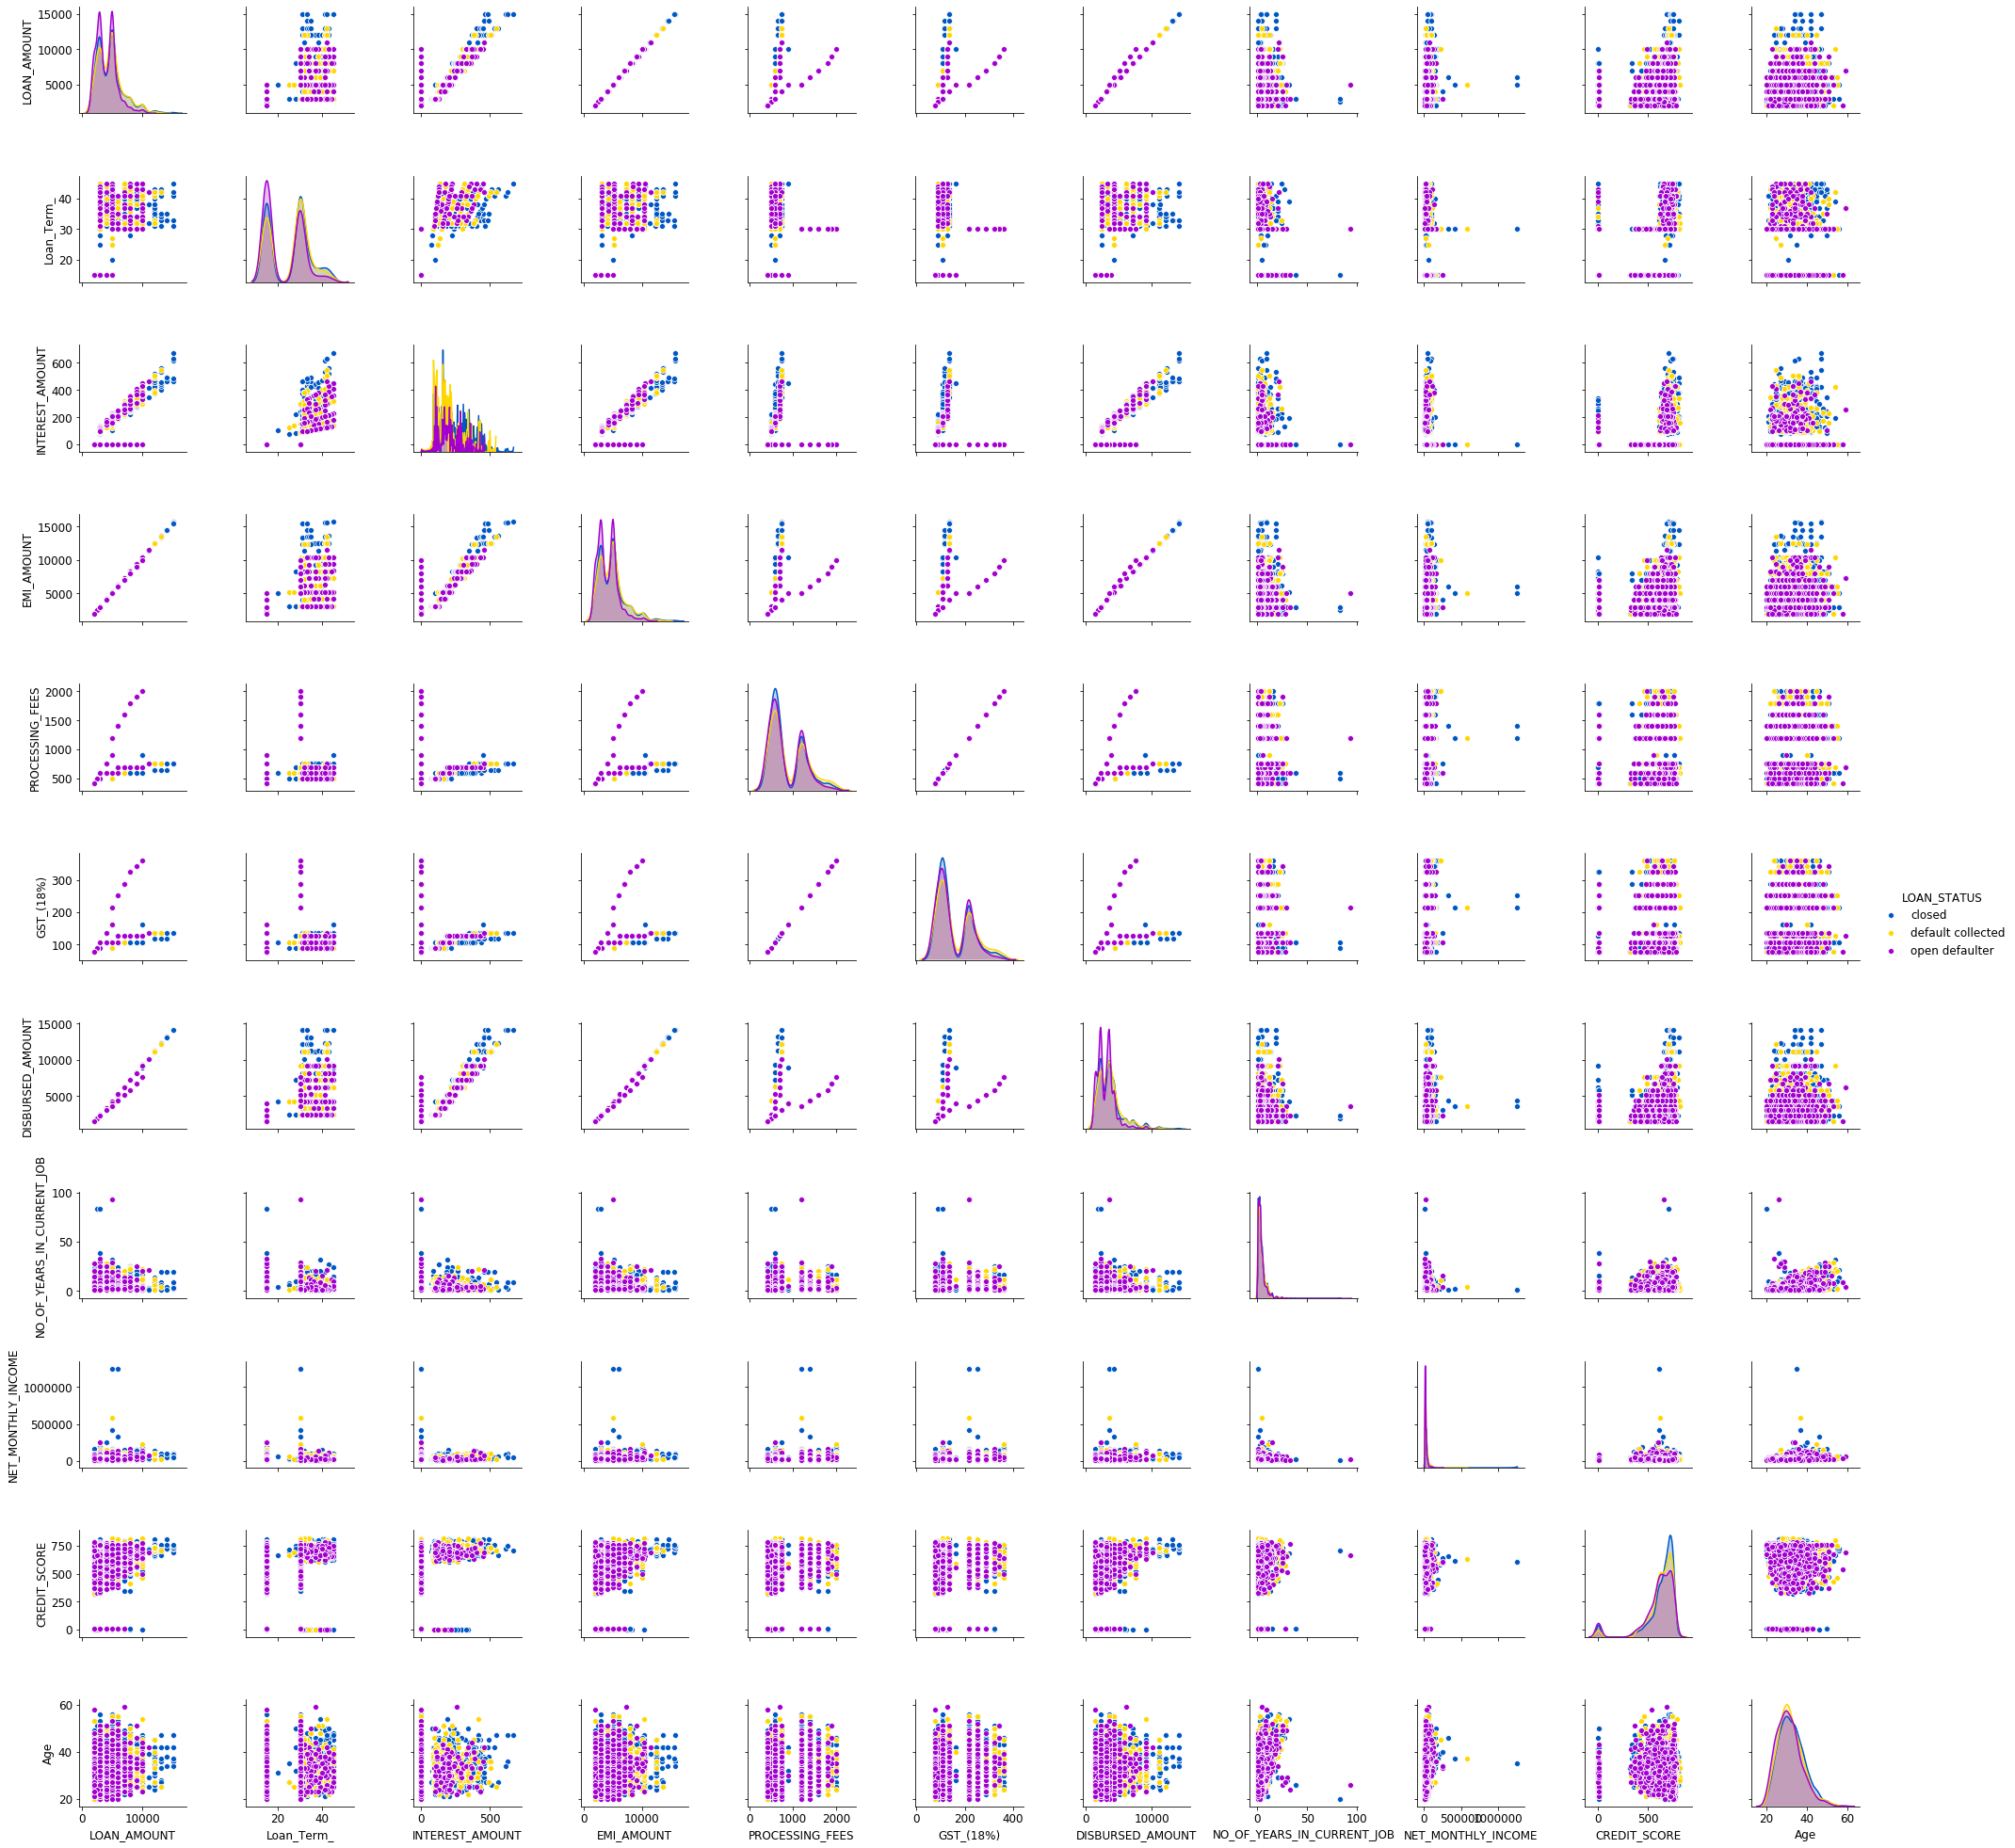

In [141]:
sns.pairplot(data1,hue='LOAN_STATUS',palette='prism')

#data["NO_OF_YEARS_IN_CURRENT_JOB"].value_counts()
'LOAN_STATUS', 'LOAN_AMOUNT', 'Loan_Term_', 'Interest_Type',
       'INTEREST_AMOUNT', 'EMI_AMOUNT', 'PROCESSING_FEES',
       'GST_(18%)',  'DISBURSED_AMOUNT',
       'Mode_of_Disbursement', 'Lender', 'Bounce_Charges_(BC)', 'GST_ON_BC',
      # 'EMI-1_COLLECTION_STATUS', 'EMI-1COLLECTED_AMOUNT', 
     #   'Defaulter_Tenure_(DT)-1', 'Interest_Charged_(IC)-1',
      # 'GST_ON_IC-1', 'Total_Repayment-1', 
        'Total_Collected', 'REMARKS', 'Policy_ID',
       'Refund_Amount', 'Type_of_Application_', 'GENDER', 
       'MARITAL_STATUS', 'RESIDENTIAL_STATUS-OWNED/RENTED',
       
        'STATE', 'CITY',
        'OCCUPATION',# 'COMPANY_NAME', 
       'NO_OF_YEARS_IN_CURRENT_JOB',
       'COMPANY_DESIGNATION_-_MANAGER,_WORKER,_SUPERVISOR',
       'NET_MONTHLY_INCOME', 'MODE_OF_SALARY_-_CHEQUE,_NEFT,_FUND_TRANSFER',
       'CREDIT_SCORE', 'LOAN_PURPOSE', 'Payment_Frequency', 'Loan_Tenure_unit',
       'CUSTOMER'S_BANK_NAME','Age',
       Loan_Tenure_unit,Interest_Type,Mode of Disbursement,Total_Repayment-1-null 

# Using ANN

In [142]:
import keras
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

Using TensorFlow backend.


In [196]:
X1= d1.values
#X = dataset.iloc[:,:20].values
#y1 = data1["LOAN_STATUS"].values
y1 = y
y1=y1.reshape(-1, 1)
y1= ohe.fit_transform(y1)#.toarray()
#y1 = keras.utils.to_categorical(y1, num_classes=len(set(y1)), dtype='float32')

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning:

The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.



In [197]:
y1=y1.toarray()

In [198]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X1 = sc.fit_transform(X1)
X1

array([[ 2.6336577 ,  2.18499926,  4.06069931, ..., -0.02523772,
        -0.01456791, -0.13140559],
       [ 0.20560881,  0.5447533 ,  1.05585939, ..., -0.02523772,
        -0.01456791, -0.13140559],
       [ 0.20560881,  0.5447533 ,  1.05585939, ..., -0.02523772,
        -0.01456791, -0.13140559],
       ...,
       [-0.28000097, -1.09549265, -0.44656057, ..., -0.02523772,
        -0.01456791, -0.13140559],
       [-1.25122053, -1.09549265, -0.44656057, ..., -0.02523772,
        -0.01456791, -0.13140559],
       [-0.76561075, -1.09549265, -0.44656057, ..., -0.02523772,
        -0.01456791, -0.13140559]])

In [199]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y1,test_size = 0.20)

In [200]:
from keras.models import Sequential
from keras.layers import Dense
from keras import models
from keras import layers
# Neural network
model = Sequential()
model.add(layers.Dropout(0.2, input_shape=(len(d1.columns),)))
model.add(Dense(units =16,kernel_initializer = 'uniform',input_dim=len(d1.columns), activation='relu'))
model.add(Dense(units =12, kernel_initializer = 'uniform',activation='relu'))
model.add(Dense(units =3,kernel_initializer = 'uniform', activation='softmax'))

In [201]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [202]:
history1=model.fit(X_train1, y_train1, epochs=50,validation_split=0.1, batch_size=64,shuffle=True)

Train on 3393 samples, validate on 377 samples
Epoch 1/50
3393/3393 [==============================] - 0s 58us/step - loss: 1.0669 - accuracy: 0.5340 - val_loss: 1.0044 - val_accuracy: 0.5491
Epoch 2/50
3393/3393 [==============================] - 0s 32us/step - loss: 0.9470 - accuracy: 0.5414 - val_loss: 0.9108 - val_accuracy: 0.5491
Epoch 3/50
3393/3393 [==============================] - 0s 34us/step - loss: 0.8454 - accuracy: 0.5470 - val_loss: 0.7932 - val_accuracy: 0.5915
Epoch 4/50
3393/3393 [==============================] - 0s 32us/step - loss: 0.6972 - accuracy: 0.6923 - val_loss: 0.6209 - val_accuracy: 0.7215
Epoch 5/50
3393/3393 [==============================] - 0s 31us/step - loss: 0.5526 - accuracy: 0.7362 - val_loss: 0.5154 - val_accuracy: 0.7533
Epoch 6/50
3393/3393 [==============================] - 0s 31us/step - loss: 0.4522 - accuracy: 0.8296 - val_loss: 0.4525 - val_accuracy: 0.8568
Epoch 7/50
3393/3393 [==============================] - 0s 31us/step - loss: 0.3813

In [203]:
y1.shape

(4713, 3)

In [204]:
#model.fit(X1, y1, epochs=20, batch_size=64, validation_split=0.1, shuffle=True)

In [205]:
y_pred1 = model.predict(X_test1)
#Converting predictions to label
pred = list()
for i in range(len(y_pred1)):
    pred.append(np.argmax(y_pred1[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test1)):
    test.append(np.argmax(y_test1[i]))

In [206]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 92.47083775185578


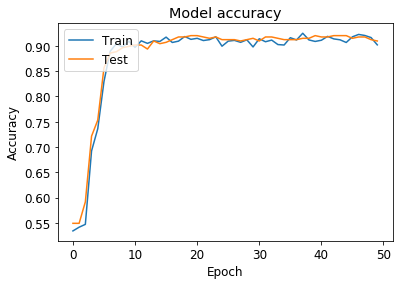

In [207]:
#d2=pd.get_dummies(df_active,drop_first=True)
#list(d2.columns)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

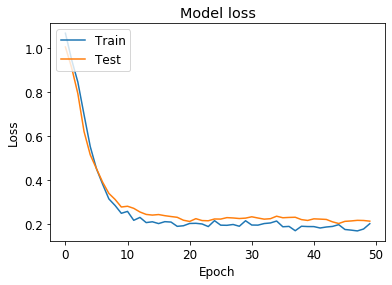

In [351]:
plt.plot(history1.history['loss']) 
plt.plot(history1.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

# Active users dataset

In [208]:
X1.shape

(4713, 617)

In [209]:
X_test1.shape

(943, 617)

In [210]:
X_train1.shape

(3770, 617)

In [211]:
len(d1)

4713

In [212]:
active=pd.get_dummies(data["LOAN_STATUS"]=="active")

In [213]:
len(active)

5445

In [214]:
len(df_active.columns)

25

In [215]:
g=pd.get_dummies(data)

In [388]:
#list(g.columns)

In [295]:
act=g[g["LOAN_STATUS_active"]==1]

In [296]:
#act=act.drop(['LOAN_STATUS_active','LOAN_STATUS_closed','LOAN_STATUS_default collected','LOAN_STATUS_open defaulter'], axis=1)

In [363]:
other=g[g["LOAN_STATUS_active"]!=1]
#other=other.drop(['LOAN_STATUS_active','LOAN_STATUS_closed','LOAN_STATUS_default collected','LOAN_STATUS_open defaulter'], axis=1)

In [364]:
X_other=other.values
X_other= sc.fit_transform(X_other)

y_other = data1["LOAN_STATUS"].values

y_other=le.transform(y_other)
y_other=y_other.astype("float64")

In [365]:
y_other=y_other.reshape(-1, 1)
y_other= ohe.fit_transform(y_other)
y_other=y_other.toarray()

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning:

The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.



In [366]:
X_act=act.values
X_act= sc.fit_transform(X_act)

In [367]:
model_act = Sequential()
model_act.add(layers.Dropout(0.2, input_shape=(len(act.columns),)))
model_act.add(Dense(units=16,kernel_initializer = 'uniform', input_dim=len(g.columns), activation='relu'))
model_act.add(Dense(units=12,kernel_initializer = 'uniform',activation='relu'))
model_act.add(Dense(units=3,kernel_initializer = 'uniform',activation='softmax'))

In [368]:
len(other.columns)

678

In [369]:
model_act.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [370]:
history=model_act.fit(X_other, y_other, epochs=40,validation_split=0.1, batch_size=64)

Train on 4241 samples, validate on 472 samples
Epoch 1/40
4241/4241 [==============================] - 0s 68us/step - loss: 1.0329 - accuracy: 0.5539 - val_loss: 1.1055 - val_accuracy: 0.3411
Epoch 2/40
4241/4241 [==============================] - 0s 39us/step - loss: 0.7993 - accuracy: 0.5593 - val_loss: 0.9638 - val_accuracy: 0.3432
Epoch 3/40
4241/4241 [==============================] - 0s 37us/step - loss: 0.6024 - accuracy: 0.7008 - val_loss: 0.8280 - val_accuracy: 0.3856
Epoch 4/40
4241/4241 [==============================] - 0s 36us/step - loss: 0.4715 - accuracy: 0.7541 - val_loss: 0.7433 - val_accuracy: 0.4004
Epoch 5/40
4241/4241 [==============================] - 0s 38us/step - loss: 0.3967 - accuracy: 0.7913 - val_loss: 0.6484 - val_accuracy: 0.7860
Epoch 6/40
4241/4241 [==============================] - 0s 40us/step - loss: 0.3230 - accuracy: 0.9182 - val_loss: 0.5137 - val_accuracy: 0.8708
Epoch 7/40
4241/4241 [==============================] - 0s 37us/step - loss: 0.2227

In [371]:
y_pred_act = model_act.predict(X_act)
#Converting predictions to label
pred_active = list()
for i in range(len(y_pred_act)):
    pred_active.append(np.argmax(y_pred_act[i]))
#Converting one hot encoded test label to label


In [372]:
len(df_active)

732

In [373]:
len(pred)

943

In [374]:
pred_active=list(le.inverse_transform(pred_active))

In [375]:
pred_active

['open defaulter',
 'default collected',
 'open defaulter',
 'default collected',
 'default collected',
 'open defaulter',
 'default collected',
 'default collected',
 'open defaulter',
 'default collected',
 'default collected',
 'closed',
 'open defaulter',
 'closed',
 'open defaulter',
 'open defaulter',
 'open defaulter',
 'default collected',
 'open defaulter',
 'open defaulter',
 'default collected',
 'closed',
 'default collected',
 'closed',
 'open defaulter',
 'open defaulter',
 'open defaulter',
 'open defaulter',
 'closed',
 'default collected',
 'open defaulter',
 'default collected',
 'default collected',
 'open defaulter',
 'default collected',
 'default collected',
 'open defaulter',
 'closed',
 'open defaulter',
 'default collected',
 'default collected',
 'default collected',
 'default collected',
 'default collected',
 'open defaulter',
 'open defaulter',
 'default collected',
 'default collected',
 'closed',
 'open defaulter',
 'default collected',
 'closed',
 'open 

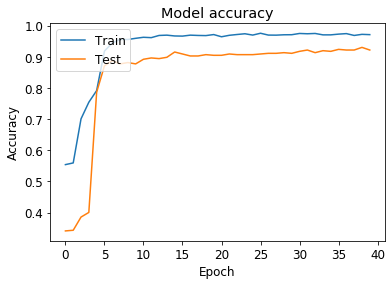

In [376]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

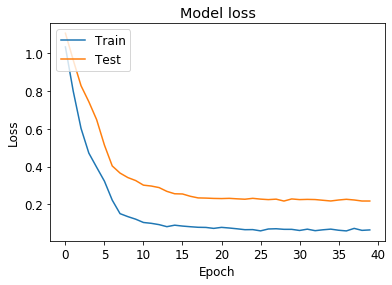

In [377]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

In [378]:
od=0
dcol=0
clo=0
for i in pred_active:
    if i=="open defaulter":
        od+=1
    if i=="default collected":
        dcol+=1
    if i=="closed":
        clo+=1

In [379]:
od

303

In [380]:
dcol

266

In [381]:
clo

163